## Introduction

This notebook contains the code to reproduce the plots in section regarding the high $M$ (i.e. $M\propto N(N-1)$) behavior of TAP and ITAP. Running the cells of this notebook in order should will reproduce all the plots  (both in the main text and in the appendix) related to this regime. All experiments are concerned with the TAP solution obtained with Frank-Wolf, and with the ITAP solution obtained with RITAP.

In [1]:
usetex=False

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
from matplotlib import cm
pd.set_option('display.max_columns', None)
import copy

colors=["C0","C1", "C2", "C3", "C4", "C5","C6","C7", "C8", "C9", "C10", "C11","C12","C13", "C14", "C15", "C16", "C17","C18", "C19", "C20"]

## Auxiliary functions

In [3]:
def calculate_mean_std_mean(df, group_columns):
    """
    the output dataframe has double the columns of the initial dataframe. 
    The first half of the columms have the same name as the columns of the original dataframe and contain the mean of the dataframe values.
    The second half of the columns have '_std' appended to the column name and contain the standard deviation of the mean (hence the data std divided by sqrt(number of samples))
    """
    grouped_df = df.groupby(group_columns)
    new_df_dict={}
    for col in list(df.columns)+[col+'_std' for col in df.columns]:
        new_df_dict[col]=[]
    for name, group in grouped_df:
        for col in group.columns:
            new_df_dict[col].append(np.mean(group[col]))
            new_df_dict[col+'_std'].append(np.std(group[col])/np.sqrt(group.shape[0]))
    result_df=pd.DataFrame.from_dict(new_df_dict,orient='index').transpose()
    return result_df


In [4]:
def calculate_mean_std(df, group_columns):
    # Grouping the DataFrame based on the given columns
    grouped_df = df.groupby(group_columns)

    # Calculating mean and standard deviation for each group
    result_df = grouped_df.agg(['mean', 'std'])

    # Flattening the multi-level columns
    result_df.columns = [col[0] + '_std' if col[1] == 'std' else col[0] for col in result_df.columns]

    #result_df.columns = ['_'.join(col).strip() for col in result_df.columns.values]
    result_df.reset_index(inplace=True)
    return result_df

# Paper plots
### Runnning the following cells in order one obtains all the figures concerning the high $M$ experiments reported in the paper. 
The figures are produced in a different order from the appearance order fo the paper. Next to each plot the corresponding paper reference is given.

In [5]:
usetex=False # if True it will format labels with latex

In [6]:
# K experiments with very high M and variable tmax to improve convergence, RRG, OD pairs uniformly at random (origin distinct from destination). 20 seeds per run except 10 seeds for N=512
#N=128, d=3,6,12,24,48
#d=3, N=32,64,128,256,512
df_load=pd.read_csv("results/state_exp_highM_vartmax_final.txt", header=0,index_col=False, sep=' ')
df_load.drop(columns='identifier',inplace=True)

df_load['en_gain_FW_SP']=1-df_load['FW_fin_energy']/df_load['shortest_path_energy']
df_load['en_diff_intFW_FW']=df_load['int_FW_path_energy']-df_load['FW_fin_energy']
df_load['rel_en_diff_intFW_FW']=df_load['int_FW_path_energy']/df_load['FW_fin_energy']-1
df_load['eta']=df_load['M']/(df_load['N']*(df_load['N']-1))
df_load['en_gain_intFW_SP']=1-df_load['int_FW_path_energy']/df_load['shortest_path_energy']
df_load['M/Nd']=df_load['M']/(df_load['N']*df_load['d'])
df_load['rho']=2*df_load['M/Nd']*np.log(df_load['N'])/(np.log(df_load['d']))
df_load['intFW_avg_flow_over_rho']=df_load['avg_traf_int_FW']/df_load['rho']
df_load['rel_opt_gap']=df_load['FW_fin_opt_gap']/df_load['FW_fin_energy']

df_mean_std=calculate_mean_std_mean(df_load, group_columns=["N", "M", "gamma", "d"])



## Figure 7
### Convergence of TAP to ITAP in energy
figure in main text with RRG with d=3, Randomly uniform OD pairs, gamma=2 

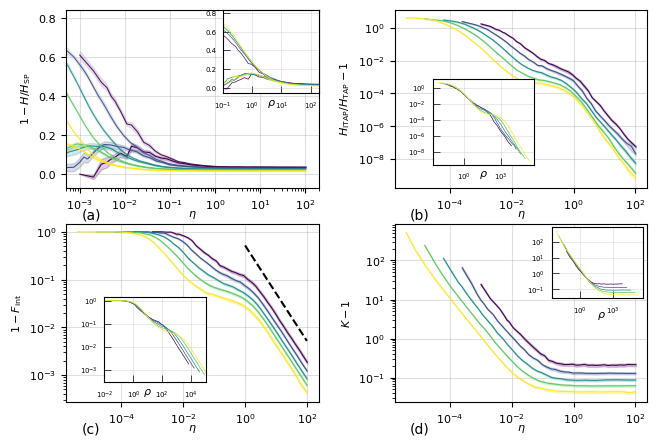

In [7]:
#2x2 plots of dependence on N of FW/RITAP gap, Fint, degen.
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

#2x2 plots of dependence on N of FW/RITAP gap, Fint, degen.
#plots for BPR nonlinearity
matplotlib.rcParams.update({'text.usetex': usetex,'font.size': 8})
fig, axes = plt.subplots(2, 2, figsize=(7.5,5.1),gridspec_kw={'wspace': 0.3})   
x_to_plot='eta'
x_to_plot_inset='rho'
###UPPER LEFT####
linewidth=0.8
linewidth_inset=0.5
font_size_inset=5
y_to_plot= 'en_gain_intFW_SP'#'rel_en_diff_intFW_FW'#'frac_shortest_paths'#'avg_traf_int_paths'#'frac_int_paths'#'rel_opt_gap'#'RGAP'#'sup_paths_od_degen_rtol_1e-3'#'avg_degen_od_FW'#'avg_traf_int_paths' #'frac_shortest_paths'#'frac_int_paths'#'rel_opt_gap'#'RGAP'#'en_gain_intFW_SP' #'avg_traf_shortest_paths'
y_to_plot2= 'en_gain_FW_SP'#'rel_en_diff_intFW_FW'#'frac_shortest_paths'#'avg_traf_int_paths'#'frac_int_paths'#'rel_opt_gap'#'RGAP'#'sup_paths_od_degen_rtol_1e-3'#'avg_degen_od_FW'#'avg_traf_int_paths' #'frac_shortest_paths'#'frac_int_paths'#'rel_opt_gap'#'RGAP'#'en_gain_intFW_SP' #'avg_traf_shortest_paths'
d=3
df1=df_mean_std[(df_mean_std['d']==d)]
maxN=max(df1['N'].unique().tolist())
minN=min(df1['N'].unique().tolist())
shaded_errors=True
errorbars=False
colormap = cm.viridis
norm = plt.Normalize(vmin=np.log(minN), vmax=np.log(maxN))

ax_inset = inset_axes(axes[0, 0], width="40%", height="40%", loc='lower left', bbox_to_anchor=(0.6, 0.5, 0.95, 1.17),bbox_transform=axes[0,0].transAxes)
# Map the color value to a color using the colormap
for N in df1['N'].unique().tolist():
    df_sel=df1[df1['N']==N]
    df_sel= df_sel.sort_values(by=x_to_plot)
    color = colormap(norm(np.log(N)))
    
    if(errorbars):
        axes[0,0].errorbar(df_sel[x_to_plot],df_sel[y_to_plot],alpha=0.9,c=color,label=f"{N}",yerr=df_sel[y_to_plot+'_std'],capsize=1,lw=linewidth)
        ax_inset.errorbar(df_sel[x_to_plot_inset],df_sel[y_to_plot],alpha=0.9,c=color,label=f"{N}",yerr=df_sel[y_to_plot+'_std'],capsize=1,lw=linewidth)

    else:
        axes[0,0].plot(df_sel[x_to_plot],df_sel[y_to_plot],alpha=1,c=color,label=f"${N}$",lw=linewidth)
        ax_inset.plot(df_sel[x_to_plot_inset],df_sel[y_to_plot],alpha=1,c=color,label=f"${N}$",lw=linewidth_inset)

        if(y_to_plot2!=''):
            axes[0,0].plot(df_sel[x_to_plot],df_sel[y_to_plot2],alpha=0.9,c=color,lw=linewidth)
            ax_inset.plot(df_sel[x_to_plot_inset],df_sel[y_to_plot2],alpha=0.9,c=color,lw=linewidth_inset)

        if shaded_errors:
            axes[0,0].fill_between(df_sel[x_to_plot],(df_sel[y_to_plot]-df_sel[y_to_plot+'_std']),(df_sel[y_to_plot]+df_sel[y_to_plot+'_std']),color=color,alpha=0.2)
            #ax_inset.fill_between(df_sel[x_to_plot_inset],(df_sel[y_to_plot]-df_sel[y_to_plot+'_std']),(df_sel[y_to_plot]+df_sel[y_to_plot+'_std']),color=color,alpha=0.2)

            if(y_to_plot2!=''):
                axes[0,0].fill_between(df_sel[x_to_plot],(df_sel[y_to_plot2]-df_sel[y_to_plot2+'_std']),(df_sel[y_to_plot2]+df_sel[y_to_plot2+'_std']),color=color,alpha=0.1)
                #ax_inset.fill_between(df_sel[x_to_plot_inset],(df_sel[y_to_plot2]-df_sel[y_to_plot2+'_std']),(df_sel[y_to_plot2]+df_sel[y_to_plot2+'_std']),color=color,alpha=0.1)

axes[0,0].grid(alpha=0.4)
axes[0,0].set_xlabel(r"$\eta$")
axes[0,0].set_ylabel("$1-H/H_\mathrm{SP}$")

ax_inset.set_xscale('log')
ax_inset.grid(alpha=0.4,linewidth=linewidth_inset)
ax_inset.tick_params(labelsize=font_size_inset) 
ax_inset.set_xlabel(r"$\rho$",labelpad=-10)
ax_inset.tick_params(axis='x', direction='in', length=5, width=linewidth_inset, pad=5)
ax_inset.tick_params(axis='y', direction='in', length=5, width=linewidth_inset, pad=5)
ax_inset.set_xlim([1e-1,200])

ax_inset.minorticks_off()
#ax_inset.set_ylim([1e-2,1.9e-1])
axes[0,0].grid(alpha=0.4)
axes[0,0].set_xlabel(r"$\eta$",labelpad=-2)

axes[0,0].set_ylabel("$1-H/H_\mathrm{SP}$")
axes[0,0].set_xscale('log')
axes[0,0].set_xlim([5e-4,2e2])
#axes[0,0].set_ylim([1e-2,1.7e-1])

axes[0,0].text(0.1, -0.15, "(a)", ha='center', va='center', transform=axes[0,0].transAxes, fontsize=10)

##################
###UPPER RIGHT####
##################

y_to_plot= 'rel_en_diff_intFW_FW'#'frac_shortest_paths'#'avg_traf_int_paths'#'frac_int_paths'#'rel_opt_gap'#'RGAP'#'sup_paths_od_degen_rtol_1e-3'#'avg_degen_od_FW'#'avg_traf_int_paths' #'frac_shortest_paths'#'frac_int_paths'#'rel_opt_gap'#'RGAP'#'en_gain_intFW_SP' #'avg_traf_shortest_paths'
y_to_plot2= ''#'rel_en_diff_intFW_FW'#'frac_shortest_paths'#'avg_traf_int_paths'#'frac_int_paths'#'rel_opt_gap'#'RGAP'#'sup_paths_od_degen_rtol_1e-3'#'avg_degen_od_FW'#'avg_traf_int_paths' #'frac_shortest_paths'#'frac_int_paths'#'rel_opt_gap'#'RGAP'#'en_gain_intFW_SP' #'avg_traf_shortest_paths'
df1=df_mean_std[(df_mean_std['d']==d)]
maxN=max(df1['N'].unique().tolist())
minN=min(df1['N'].unique().tolist())
shaded_errors=True
errorbars=False
colormap = cm.viridis
norm = plt.Normalize(vmin=np.log(minN), vmax=np.log(maxN))
ax_inset = inset_axes(axes[0, 1], width="40%", height="40%", loc='lower left', bbox_to_anchor=(0.13, 0.1, 1, 1.2),bbox_transform=axes[0,1].transAxes)
# Map the color value to a color using the colormap
for N in df1['N'].unique().tolist():
    df_sel=df1[df1['N']==N]
    df_sel= df_sel.sort_values(by=x_to_plot)
    color = colormap(norm(np.log(N)))
    
    if(errorbars):
        axes[0,1].errorbar(df_sel[x_to_plot],df_sel[y_to_plot],alpha=0.9,c=color,label=f"{N}",yerr=df_sel[y_to_plot+'_std'],capsize=1,lw=linewidth)
        ax_inset.errorbar(df_sel[x_to_plot_inset],df_sel[y_to_plot],alpha=0.9,c=color,label=f"{N}",yerr=df_sel[y_to_plot+'_std'],capsize=1,lw=linewidth)

    else:
        axes[0,1].plot(df_sel[x_to_plot],df_sel[y_to_plot],alpha=1,c=color,label=f"${N}$",lw=linewidth)
        ax_inset.plot(df_sel[x_to_plot_inset],df_sel[y_to_plot],alpha=1,c=color,label=f"${N}$",lw=linewidth_inset)

        if(y_to_plot2!=''):
            axes[0,1].plot(df_sel[x_to_plot],df_sel[y_to_plot2],alpha=0.9,c=color,lw=linewidth)
            ax_inset.plot(df_sel[x_to_plot_inset],df_sel[y_to_plot2],alpha=0.9,c=color,lw=linewidth_inset)

        if shaded_errors:
            axes[0,1].fill_between(df_sel[x_to_plot],(df_sel[y_to_plot]-df_sel[y_to_plot+'_std']),(df_sel[y_to_plot]+df_sel[y_to_plot+'_std']),color=color,alpha=0.2)
            #ax_inset.fill_between(df_sel[x_to_plot_inset],(df_sel[y_to_plot]-df_sel[y_to_plot+'_std']),(df_sel[y_to_plot]+df_sel[y_to_plot+'_std']),color=color,alpha=0.2)

            if(y_to_plot2!=''):
                axes[0,1].fill_between(df_sel[x_to_plot],(df_sel[y_to_plot2]-df_sel[y_to_plot2+'_std']),(df_sel[y_to_plot2]+df_sel[y_to_plot2+'_std']),color=color,alpha=0.1)
                #ax_inset.fill_between(df_sel[x_to_plot_inset],(df_sel[y_to_plot2]-df_sel[y_to_plot2+'_std']),(df_sel[y_to_plot2]+df_sel[y_to_plot2+'_std']),color=color,alpha=0.1)

axes[0,1].grid(alpha=0.4)
axes[0,1].set_xlabel(r"$\eta$",labelpad=-2)

axes[0,1].set_ylabel("$H_\mathrm{ITAP}/H_\mathrm{TAP}-1$")
#axes[1].set_ylabel("Fraction of rerouted flow")
axes[0,1].set_xscale('log')
axes[0,1].set_yscale('log')
#axes[1].set_xlim([1e-1,1000])
#axes[1].set_ylim([1e-1,100])

axes[0,1].text(0.1, -0.15, "(b)", ha='center', va='center', transform=axes[0,1].transAxes, fontsize=10)

ax_inset.set_xscale('log')
ax_inset.set_yscale('log')
ax_inset.grid(alpha=0.4,linewidth=linewidth_inset)
ax_inset.tick_params(labelsize=font_size_inset) 
ax_inset.set_xlabel(r"$\rho$",labelpad=-10)
ax_inset.tick_params(axis='x', direction='in', length=5, width=linewidth_inset, pad=5)
ax_inset.tick_params(axis='y', direction='in', length=5, width=linewidth_inset, pad=5)
ax_inset.minorticks_off()

##################
###LOWER LEFT####
##################


y_to_plot= 'frac_integer_paths_tol_1e-04'#'frac_shortest_paths'#'avg_traf_int_paths'#'frac_int_paths'#'rel_opt_gap'#'RGAP'#'sup_paths_od_degen_rtol_1e-3'#'avg_degen_od_FW'#'avg_traf_int_paths' #'frac_shortest_paths'#'frac_int_paths'#'rel_opt_gap'#'RGAP'#'en_gain_intFW_SP' #'avg_traf_shortest_paths'
y_to_plot2= ''#'rel_en_diff_intFW_FW'#'frac_shortest_paths'#'avg_traf_int_paths'#'frac_int_paths'#'rel_opt_gap'#'RGAP'#'sup_paths_od_degen_rtol_1e-3'#'avg_degen_od_FW'#'avg_traf_int_paths' #'frac_shortest_paths'#'frac_int_paths'#'rel_opt_gap'#'RGAP'#'en_gain_intFW_SP' #'avg_traf_shortest_paths'
N=128
df1=df_mean_std[(df_mean_std['d']==d)]
maxN=max(df1['N'].unique().tolist())
minN=min(df1['N'].unique().tolist())
shaded_errors=True
errorbars=False
colormap = cm.viridis
norm = plt.Normalize(vmin=np.log(minN), vmax=np.log(maxN))

ax_inset = inset_axes(axes[1,0], width="40%", height="40%", loc='lower left', bbox_to_anchor=(0.13, 0.08, 1, 1.2),bbox_transform=axes[1,0].transAxes)
# Map the color value to a color using the colormap
for N in df1['N'].unique().tolist():
    df_sel=df1[df1['N']==N]
    df_sel= df_sel.sort_values(by=x_to_plot)
    color = colormap(norm(np.log(N)))
    
    if(errorbars):
        axes[1,0].errorbar(df_sel[x_to_plot],1-df_sel[y_to_plot],alpha=0.9,c=color,label=f"{N}",yerr=df_sel[y_to_plot+'_std'],capsize=1,lw=linewidth)
        ax_inset.errorbar(df_sel[x_to_plot_inset],1-df_sel[y_to_plot],alpha=0.9,c=color,label=f"{N}",yerr=df_sel[y_to_plot+'_std'],capsize=1,lw=linewidth)

    else:
        axes[1,0].plot(df_sel[x_to_plot],1-df_sel[y_to_plot],alpha=1,c=color,label=f"${N}$",lw=linewidth)
        ax_inset.plot(df_sel[x_to_plot_inset],1-df_sel[y_to_plot],alpha=1,c=color,label=f"${N}$",lw=linewidth_inset)

        if(y_to_plot2!=''):
            axes[1,0].plot(df_sel[x_to_plot],1-df_sel[y_to_plot2],alpha=0.9,c=color,lw=linewidth)
            ax_inset.plot(df_sel[x_to_plot_inset],1-df_sel[y_to_plot2],alpha=0.9,c=color,lw=linewidth_inset)

        if shaded_errors:
            axes[1,0].fill_between(df_sel[x_to_plot],1-(df_sel[y_to_plot]-df_sel[y_to_plot+'_std']),1-(df_sel[y_to_plot]+df_sel[y_to_plot+'_std']),color=color,alpha=0.2)
            #ax_inset.fill_between(df_sel[x_to_plot_inset],1-(df_sel[y_to_plot]-df_sel[y_to_plot+'_std']),1-(df_sel[y_to_plot]+df_sel[y_to_plot+'_std']),color=color,alpha=0.2)

            if(y_to_plot2!=''):
                axes[1,0].fill_between(df_sel[x_to_plot],1-(df_sel[y_to_plot2]-df_sel[y_to_plot2+'_std']),1-(df_sel[y_to_plot2]+df_sel[y_to_plot2+'_std']),color=color,alpha=0.1)
                #ax_inset.fill_between(df_sel[x_to_plot_inset],1-(df_sel[y_to_plot2]-df_sel[y_to_plot2+'_std']),1-(df_sel[y_to_plot2]+df_sel[y_to_plot2+'_std']),color=color,alpha=0.1)

                
                
ax_inset.set_xscale('log')
ax_inset.set_yscale('log')
ax_inset.grid(alpha=0.4,linewidth=linewidth_inset)
ax_inset.tick_params(labelsize=font_size_inset) 
ax_inset.set_xlabel(r"$\rho$",labelpad=-10,)
ax_inset.tick_params(axis='x', direction='in', length=5, width=linewidth_inset, pad=5)
ax_inset.tick_params(axis='y', direction='in', length=5, width=linewidth_inset, pad=5)
ax_inset.minorticks_off()
ax_inset.set_xlim([1e-2,1e5])
ax_inset.xaxis.set_label_coords(.43, -.05)



axes[1,0].grid(alpha=0.4)
axes[1,0].set_xlabel(r"$\eta$",labelpad=-2)

axes[1,0].set_ylabel("$1-F_\mathrm{int}$")
#axes[1].set_ylabel("Fraction of rerouted flow")
axes[1,0].set_xscale('log')
axes[1,0].set_yscale('log')
#axes[1].set_xlim([1e-1,1000])
#axes[1].set_ylim([1e-1,100])

axes[1,0].text(0.1, -0.15, "(c)", ha='center', va='center', transform=axes[1,0].transAxes, fontsize=10)
xlin=np.linspace(1,100,100)
power_law=0.52/xlin
axes[1,0].plot(xlin,power_law, color='black',ls='--')


##################
###LOWER RIGHT####
##################

y_to_plot= 'sup_paths_od_degen_rtol_1e-5'#'frac_shortest_paths'#'avg_traf_int_paths'#'frac_int_paths'#'rel_opt_gap'#'RGAP'#'sup_paths_od_degen_rtol_1e-3'#'avg_degen_od_FW'#'avg_traf_int_paths' #'frac_shortest_paths'#'frac_int_paths'#'rel_opt_gap'#'RGAP'#'en_gain_intFW_SP' #'avg_traf_shortest_paths'
y_to_plot2= ''#'rel_en_diff_intFW_FW'#'frac_shortest_paths'#'avg_traf_int_paths'#'frac_int_paths'#'rel_opt_gap'#'RGAP'#'sup_paths_od_degen_rtol_1e-3'#'avg_degen_od_FW'#'avg_traf_int_paths' #'frac_shortest_paths'#'frac_int_paths'#'rel_opt_gap'#'RGAP'#'en_gain_intFW_SP' #'avg_traf_shortest_paths'
N=128
df1=df_mean_std[(df_mean_std['d']==d)]
maxN=max(df1['N'].unique().tolist())
minN=min(df1['N'].unique().tolist())
shaded_errors=True
errorbars=False
colormap = cm.viridis
norm = plt.Normalize(vmin=np.log(minN), vmax=np.log(maxN))

ax_inset = inset_axes(axes[1,1], width="40%", height="40%", loc='lower left', bbox_to_anchor=(0.6, 0.55, 0.9, 1),bbox_transform=axes[1,1].transAxes)
# Map the color value to a color using the colormap
for N in df1['N'].unique().tolist():
    df_sel=df1[df1['N']==N]
    df_sel= df_sel.sort_values(by=x_to_plot)
    color = colormap(norm(np.log(N)))
    
    if(errorbars):
        axes[1,1].errorbar(df_sel[x_to_plot],df_sel[y_to_plot]-1,alpha=0.9,c=color,label=f"{N}",yerr=df_sel[y_to_plot+'_std'],capsize=1,lw=linewidth)
        ax_inset.errorbar(df_sel[x_to_plot_inset],df_sel[y_to_plot]-1,alpha=0.9,c=color,label=f"{N}",yerr=df_sel[y_to_plot+'_std'],capsize=1,lw=linewidth)

    else:
        axes[1,1].plot(df_sel[x_to_plot],df_sel[y_to_plot]-1,alpha=1,c=color,label=f"${N}$",lw=linewidth)
        ax_inset.plot(df_sel[x_to_plot_inset],df_sel[y_to_plot]-1,alpha=1,c=color,label=f"${N}$",lw=linewidth_inset)

        if(y_to_plot2!=''):
            axes[1,1].plot(df_sel[x_to_plot],df_sel[y_to_plot2]-1,alpha=0.9,c=color,lw=linewidth)
            #ax_inset.plot(df_sel[x_to_plot_inset],df_sel[y_to_plot2]-1,alpha=0.9,c=color,lw=linewidth_inset)

        if shaded_errors:
            axes[1,1].fill_between(df_sel[x_to_plot],(df_sel[y_to_plot]-df_sel[y_to_plot+'_std'])-1,(df_sel[y_to_plot]+df_sel[y_to_plot+'_std'])-1,color=color,alpha=0.2)
            #ax_inset.fill_between(df_sel[x_to_plot_inset],(df_sel[y_to_plot]-df_sel[y_to_plot+'_std'])-1,(df_sel[y_to_plot]+df_sel[y_to_plot+'_std'])-1,color=color,alpha=0.2)

            if(y_to_plot2!=''):
                axes[1,1].fill_between(df_sel[x_to_plot],(df_sel[y_to_plot2]-df_sel[y_to_plot2+'_std'])-1,(df_sel[y_to_plot2]+df_sel[y_to_plot2+'_std'])-1,color=color,alpha=0.1)
                #ax_inset.fill_between(df_sel[x_to_plot_inset],(df_sel[y_to_plot2]-df_sel[y_to_plot2+'_std'])-1,(df_sel[y_to_plot2]+df_sel[y_to_plot2+'_std'])-1,color=color,alpha=0.1)

                
                
ax_inset.set_xscale('log')
ax_inset.set_yscale('log')
ax_inset.grid(alpha=0.4,linewidth=linewidth_inset)
ax_inset.tick_params(labelsize=font_size_inset) 
ax_inset.set_xlabel(r"$\rho$",labelpad=-10,horizontalalignment='right')
ax_inset.tick_params(axis='x', direction='in', length=5, width=linewidth_inset, pad=5)
ax_inset.tick_params(axis='y', direction='in', length=5, width=linewidth_inset, pad=5)
ax_inset.minorticks_off()
ax_inset.xaxis.set_label_coords(.6, -.15)


axes[1,1].grid(alpha=0.4)
axes[1,1].set_xlabel(r"$\eta$",labelpad=-2)

axes[1,1].set_ylabel("$K-1$")
#axes[1].set_ylabel("Fraction of rerouted flow")
axes[1,1].set_xscale('log')
axes[1,1].set_yscale('log')


axes[1,1].text(0.1, -0.15, "(d)", ha='center', va='center', transform=axes[1,1].transAxes, fontsize=10)

plt.savefig('./results/pics/TAP_ITAP_conv_BPR_inset.pdf',bbox_inches='tight',dpi=600)


## Figure 10
### Convergence of TAP to ITAP in RRG with varying degree
figure in main text with RRG with N=128, d=3,6,12,24,48. Randomly uniform OD pairs, gamma=2 

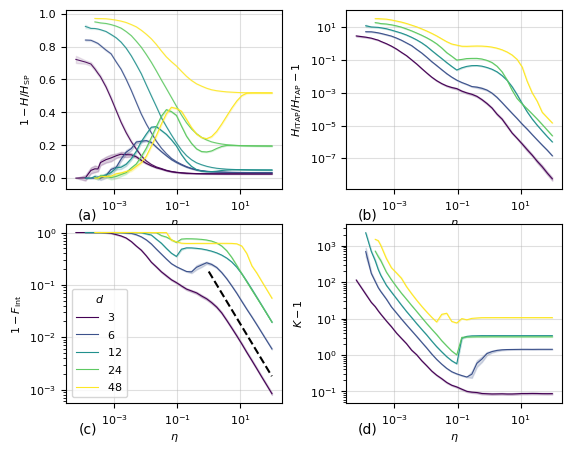

In [8]:
#2x2 plots of dependence on d of FW/RITAP gap, Fint, degen
matplotlib.rcParams.update({'text.usetex': usetex,'font.size': 8})
fig, axes = plt.subplots(2, 2, figsize=(6.4,5.1),gridspec_kw={'wspace': 0.3})   
###UPPER LEFT####
x_to_plot='eta'
y_to_plot= 'en_gain_intFW_SP'#'rel_en_diff_intFW_FW'#'frac_shortest_paths'#'avg_traf_int_paths'#'frac_int_paths'#'rel_opt_gap'#'RGAP'#'sup_paths_od_degen_rtol_1e-3'#'avg_degen_od_FW'#'avg_traf_int_paths' #'frac_shortest_paths'#'frac_int_paths'#'rel_opt_gap'#'RGAP'#'en_gain_intFW_SP' #'avg_traf_shortest_paths'
y_to_plot2= 'en_gain_FW_SP'#'rel_en_diff_intFW_FW'#'frac_shortest_paths'#'avg_traf_int_paths'#'frac_int_paths'#'rel_opt_gap'#'RGAP'#'sup_paths_od_degen_rtol_1e-3'#'avg_degen_od_FW'#'avg_traf_int_paths' #'frac_shortest_paths'#'frac_int_paths'#'rel_opt_gap'#'RGAP'#'en_gain_intFW_SP' #'avg_traf_shortest_paths'
N=128
df1=df_mean_std[(df_mean_std['N']==N)]
maxd=max(df1['d'].unique().tolist())
mind=min(df1['d'].unique().tolist())
shaded_errors=True
errorbars=False
colormap = cm.viridis
norm = plt.Normalize(vmin=np.log(mind), vmax=np.log(maxd))

# Map the color value to a color using the colormap
for d in df1['d'].unique().tolist():
    df_sel=df1[df1['d']==d]
    df_sel= df_sel.sort_values(by=x_to_plot)
    color = colormap(norm(np.log(d)))
    
    if(errorbars):
        axes[0,0].errorbar(df_sel[x_to_plot],df_sel[y_to_plot],alpha=0.9,c=color,label=f"d={d}",yerr=df_sel[y_to_plot+'_std'],capsize=1,lw=linewidth)
    else:
        axes[0,0].plot(df_sel[x_to_plot],df_sel[y_to_plot],alpha=1,c=color,label=f"${d}$",lw=linewidth)
        if(y_to_plot2!=''):
            axes[0,0].plot(df_sel[x_to_plot],df_sel[y_to_plot2],alpha=0.9,c=color,lw=linewidth)
        if shaded_errors:
            axes[0,0].fill_between(df_sel[x_to_plot],(df_sel[y_to_plot]-df_sel[y_to_plot+'_std']),(df_sel[y_to_plot]+df_sel[y_to_plot+'_std']),color=color,alpha=0.2)
            if(y_to_plot2!=''):
                axes[0,0].fill_between(df_sel[x_to_plot],(df_sel[y_to_plot2]-df_sel[y_to_plot2+'_std']),(df_sel[y_to_plot2]+df_sel[y_to_plot2+'_std']),color=color,alpha=0.1)

axes[0,0].grid(alpha=0.4)
axes[0,0].set_xlabel(r"$\eta$")

axes[0,0].set_ylabel("$1-H/H_\mathrm{SP}$")
#axes[1].set_ylabel("Fraction of rerouted flow")
axes[0,0].set_xscale('log')
#axes[0,0].set_yscale('log')
#axes[1].set_xlim([1e-1,1000])
#axes[1].set_ylim([1e-1,100])

axes[0,0].text(0.1, -0.15, "(a)", ha='center', va='center', transform=axes[0,0].transAxes, fontsize=10)

##################
###UPPER RIGHT####
##################

y_to_plot= 'rel_en_diff_intFW_FW'#'frac_shortest_paths'#'avg_traf_int_paths'#'frac_int_paths'#'rel_opt_gap'#'RGAP'#'sup_paths_od_degen_rtol_1e-3'#'avg_degen_od_FW'#'avg_traf_int_paths' #'frac_shortest_paths'#'frac_int_paths'#'rel_opt_gap'#'RGAP'#'en_gain_intFW_SP' #'avg_traf_shortest_paths'
y_to_plot2= ''#'rel_en_diff_intFW_FW'#'frac_shortest_paths'#'avg_traf_int_paths'#'frac_int_paths'#'rel_opt_gap'#'RGAP'#'sup_paths_od_degen_rtol_1e-3'#'avg_degen_od_FW'#'avg_traf_int_paths' #'frac_shortest_paths'#'frac_int_paths'#'rel_opt_gap'#'RGAP'#'en_gain_intFW_SP' #'avg_traf_shortest_paths'
N=128
df1=df_mean_std[(df_mean_std['N']==N)]
maxd=max(df1['d'].unique().tolist())
mind=min(df1['d'].unique().tolist())
shaded_errors=True
errorbars=False
colormap = cm.viridis
norm = plt.Normalize(vmin=np.log(mind), vmax=np.log(maxd))

# Map the color value to a color using the colormap
for d in df1['d'].unique().tolist():
    df_sel=df1[df1['d']==d]
    df_sel= df_sel.sort_values(by=x_to_plot)
    color = colormap(norm(np.log(d)))
    
    if(errorbars):
        axes[0,1].errorbar(df_sel[x_to_plot],df_sel[y_to_plot],alpha=0.9,c=color,label=f"d={d}",yerr=df_sel[y_to_plot+'_std'],capsize=1,lw=linewidth)
    else:
        axes[0,1].plot(df_sel[x_to_plot],df_sel[y_to_plot],alpha=1,c=color,label=f"${d}$",lw=linewidth)
        if(y_to_plot2!=''):
            axes[0,1].plot(df_sel[x_to_plot],df_sel[y_to_plot2],alpha=0.9,c=color,lw=linewidth)
        if shaded_errors:
            axes[0,1].fill_between(df_sel[x_to_plot],(df_sel[y_to_plot]-df_sel[y_to_plot+'_std']),(df_sel[y_to_plot]+df_sel[y_to_plot+'_std']),color=color,alpha=0.2)
            if(y_to_plot2!=''):
                axes[0,1].fill_between(df_sel[x_to_plot],(df_sel[y_to_plot2]-df_sel[y_to_plot2+'_std']),(df_sel[y_to_plot2]+df_sel[y_to_plot2+'_std']),color=color,alpha=0.1)

axes[0,1].grid(alpha=0.4)
axes[0,1].set_xlabel(r"$\eta$")

axes[0,1].set_ylabel("$H_\mathrm{ITAP}/H_\mathrm{TAP}-1$")
#axes[1].set_ylabel("Fraction of rerouted flow")
axes[0,1].set_xscale('log')
axes[0,1].set_yscale('log')
#axes[1].set_xlim([1e-1,1000])
#axes[1].set_ylim([1e-1,100])

axes[0,1].text(0.1, -0.15, "(b)", ha='center', va='center', transform=axes[0,1].transAxes, fontsize=10)

##################
###LOWER LEFT####
##################

y_to_plot= 'frac_integer_paths_tol_1e-04'#'frac_shortest_paths'#'avg_traf_int_paths'#'frac_int_paths'#'rel_opt_gap'#'RGAP'#'sup_paths_od_degen_rtol_1e-3'#'avg_degen_od_FW'#'avg_traf_int_paths' #'frac_shortest_paths'#'frac_int_paths'#'rel_opt_gap'#'RGAP'#'en_gain_intFW_SP' #'avg_traf_shortest_paths'
y_to_plot2= ''#'rel_en_diff_intFW_FW'#'frac_shortest_paths'#'avg_traf_int_paths'#'frac_int_paths'#'rel_opt_gap'#'RGAP'#'sup_paths_od_degen_rtol_1e-3'#'avg_degen_od_FW'#'avg_traf_int_paths' #'frac_shortest_paths'#'frac_int_paths'#'rel_opt_gap'#'RGAP'#'en_gain_intFW_SP' #'avg_traf_shortest_paths'
N=128
df1=df_mean_std[(df_mean_std['N']==N)]
maxd=max(df1['d'].unique().tolist())
mind=min(df1['d'].unique().tolist())
shaded_errors=True
errorbars=False
colormap = cm.viridis
norm = plt.Normalize(vmin=np.log(mind), vmax=np.log(maxd))

# Map the color value to a color using the colormap
for d in df1['d'].unique().tolist():
    df_sel=df1[df1['d']==d]
    df_sel= df_sel.sort_values(by=x_to_plot)
    color = colormap(norm(np.log(d)))
    
    if(errorbars):
        axes[1,0].errorbar(df_sel[x_to_plot],1-df_sel[y_to_plot],alpha=0.9,c=color,label=f"d={int(d)}",yerr=df_sel[y_to_plot+'_std'],capsize=1,lw=linewidth)
    else:
        axes[1,0].plot(df_sel[x_to_plot],1-df_sel[y_to_plot],alpha=1,c=color,label=f"${int(d)}$",lw=linewidth)
        if(y_to_plot2!=''):
            axes[1,0].plot(df_sel[x_to_plot],1-df_sel[y_to_plot2],alpha=0.9,c=color,lw=linewidth)
        if shaded_errors:
            axes[1,0].fill_between(df_sel[x_to_plot],1-(df_sel[y_to_plot]-df_sel[y_to_plot+'_std']),1-(df_sel[y_to_plot]+df_sel[y_to_plot+'_std']),color=color,alpha=0.2)
            if(y_to_plot2!=''):
                axes[1,0].fill_between(df_sel[x_to_plot],1-(df_sel[y_to_plot2]-df_sel[y_to_plot2+'_std']),1-(df_sel[y_to_plot2]+df_sel[y_to_plot2+'_std']),color=color,alpha=0.1)

axes[1,0].grid(alpha=0.4)
axes[1,0].set_xlabel(r"$\eta$")

axes[1,0].set_ylabel("$1-F_\mathrm{int}$")
#axes[1].set_ylabel("Fraction of rerouted flow")
axes[1,0].set_xscale('log')
axes[1,0].set_yscale('log')
#axes[1].set_xlim([1e-1,1000])
#axes[1].set_ylim([1e-1,100])
axes[1,0].legend(title=r"$d$")

axes[1,0].text(0.1, -0.15, "(c)", ha='center', va='center', transform=axes[1,0].transAxes, fontsize=10)

xlin=np.linspace(1,100,100)
power_law=0.18/xlin
axes[1,0].plot(xlin,power_law, color='black',ls='--')

##################
###LOWER RIGHT####
##################

y_to_plot= 'sup_paths_od_degen_rtol_1e-5'#'frac_shortest_paths'#'avg_traf_int_paths'#'frac_int_paths'#'rel_opt_gap'#'RGAP'#'sup_paths_od_degen_rtol_1e-3'#'avg_degen_od_FW'#'avg_traf_int_paths' #'frac_shortest_paths'#'frac_int_paths'#'rel_opt_gap'#'RGAP'#'en_gain_intFW_SP' #'avg_traf_shortest_paths'
y_to_plot2= ''#'rel_en_diff_intFW_FW'#'frac_shortest_paths'#'avg_traf_int_paths'#'frac_int_paths'#'rel_opt_gap'#'RGAP'#'sup_paths_od_degen_rtol_1e-3'#'avg_degen_od_FW'#'avg_traf_int_paths' #'frac_shortest_paths'#'frac_int_paths'#'rel_opt_gap'#'RGAP'#'en_gain_intFW_SP' #'avg_traf_shortest_paths'
N=128
df1=df_mean_std[(df_mean_std['N']==N)]
maxd=max(df1['d'].unique().tolist())
mind=min(df1['d'].unique().tolist())
shaded_errors=True
errorbars=False
colormap = cm.viridis
norm = plt.Normalize(vmin=np.log(mind), vmax=np.log(maxd))

# Map the color value to a color using the colormap
for d in df1['d'].unique().tolist():
    df_sel=df1[df1['d']==d]
    df_sel= df_sel.sort_values(by=x_to_plot)
    color = colormap(norm(np.log(d)))
    
    if(errorbars):
        axes[1,1].errorbar(df_sel[x_to_plot],df_sel[y_to_plot]-1,alpha=0.9,c=color,label=f"d={d}",yerr=df_sel[y_to_plot+'_std'],capsize=1,lw=linewidth)
    else:
        axes[1,1].plot(df_sel[x_to_plot],df_sel[y_to_plot]-1,alpha=1,c=color,label=f"${d}$",lw=linewidth)
        if(y_to_plot2!=''):
            axes[1,1].plot(df_sel[x_to_plot],df_sel[y_to_plot2]-1,alpha=0.9,c=color,lw=linewidth)
        if shaded_errors:
            axes[1,1].fill_between(df_sel[x_to_plot],(df_sel[y_to_plot]-df_sel[y_to_plot+'_std'])-1,(df_sel[y_to_plot]+df_sel[y_to_plot+'_std'])-1,color=color,alpha=0.2)
            if(y_to_plot2!=''):
                axes[1,1].fill_between(df_sel[x_to_plot],(df_sel[y_to_plot2]-df_sel[y_to_plot2+'_std'])-1,(df_sel[y_to_plot2]+df_sel[y_to_plot2+'_std'])-1,color=color,alpha=0.1)

axes[1,1].grid(alpha=0.4)
axes[1,1].set_xlabel(r"$\eta$")

axes[1,1].set_ylabel("$K-1$")
#axes[1].set_ylabel("Fraction of rerouted flow")
axes[1,1].set_xscale('log')
axes[1,1].set_yscale('log')
#axes[1].set_xlim([1e-1,1000])
#axes[1].set_ylim([1e-1,100])

axes[1,1].text(0.1, -0.15, "(d)", ha='center', va='center', transform=axes[1,1].transAxes, fontsize=10)

plt.savefig('./results/pics/TAP_ITAP_conv_vary_d_N128.pdf',bbox_inches='tight',dpi=600)


## Figure 12
### showing agreement between $\rho=2M\log N/(Nd\log d)$ and the average flow per edge in RITAP for $\gamma=2$
figure in appendix with RRG, Randomly uniform OD pairs, gamma=2

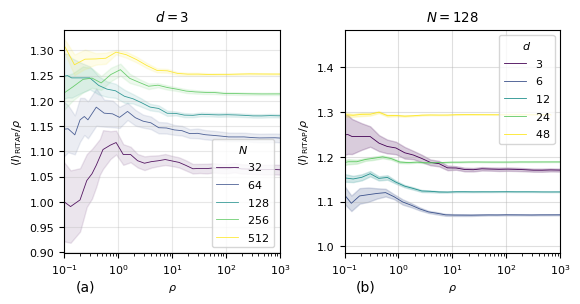

In [9]:
#plot of agreement of rho with the average flow per edge in RITAP
matplotlib.rcParams.update({'text.usetex': usetex,'font.size': 8})
fig, axes = plt.subplots(1, 2, figsize=(6.4, 2.9),gridspec_kw={'wspace': 0.3})
x_to_plot= 'rho'#'MlogN/Nd'#'avg_edge_traf_int_FW'#
y_to_plot= 'intFW_avg_flow_over_rho'#'avg_traf_int_FW'#'avg_traf_int_FW'#'rel_en_diff_intFW_FW'#'frac_shortest_paths'#'avg_traf_int_paths'#'frac_int_paths'#'rel_opt_gap'#'RGAP'#'sup_paths_od_degen_rtol_1e-3'#'avg_degen_od_FW'#'avg_traf_int_paths' #'frac_shortest_paths'#'frac_int_paths'#'rel_opt_gap'#'RGAP'#'en_gain_intFW_SP' #'avg_traf_shortest_paths'
y_to_plot2= ''#'rel_en_diff_intFW_FW'#'frac_shortest_paths'#'avg_traf_int_paths'#'frac_int_paths'#'rel_opt_gap'#'RGAP'#'sup_paths_od_degen_rtol_1e-3'#'avg_degen_od_FW'#'avg_traf_int_paths' #'frac_shortest_paths'#'frac_int_paths'#'rel_opt_gap'#'RGAP'#'en_gain_intFW_SP' #'avg_traf_shortest_paths'

d=3
linewidth=0.6 
df1=df_mean_std[(df_mean_std['d']==d)]
maxN=max(df1['N'].unique().tolist())
minN=min(df1['N'].unique().tolist())
errorbars=False
shaded_errors=True
colormap = cm.viridis
norm = plt.Normalize(vmin=np.log(minN), vmax=np.log(maxN))
for N in df1['N'].unique().tolist():
    df_sel=df1[df1['N']==N]
    df_sel= df_sel.sort_values(by=x_to_plot)
    color = colormap(norm(np.log(N)))
    if(errorbars):
        axes[0].errorbar(df_sel[x_to_plot],df_sel[y_to_plot],alpha=0.9,c=color,label=f"N={int(N)}",yerr=df_sel[y_to_plot+'_std'],capsize=2,lw=linewidth)
        if(y_to_plot2!=''):
            axes[0].errorbar(df_sel[x_to_plot],df_sel[y_to_plot2],alpha=0.9,c=color,yerr=df_sel[y_to_plot+'_std'],capsize=1,lw=linewidth)


    else:
        axes[0].plot(df_sel[x_to_plot],df_sel[y_to_plot],alpha=0.9,c=color,label=rf"${int(N)}$",lw=linewidth)
        if(y_to_plot2!=''):
            axes[0].plot(df_sel[x_to_plot],df_sel[y_to_plot2],alpha=0.9,c=color,lw=linewidth)
        if shaded_errors:
            axes[0].fill_between(df_sel[x_to_plot],(df_sel[y_to_plot]-df_sel[y_to_plot+'_std']),(df_sel[y_to_plot]+df_sel[y_to_plot+'_std']),color=color,alpha=0.1)
            if(y_to_plot2!=''):
                axes[0].fill_between(df_sel[x_to_plot],(df_sel[y_to_plot2]-df_sel[y_to_plot2+'_std']),(df_sel[y_to_plot2]+df_sel[y_to_plot2+'_std']),color=color,alpha=0.1)
axes[0].grid(alpha=0.3)
axes[0].set_xlabel(r"$\rho$")
axes[0].set_ylabel(r"$\langle I\rangle_\mathrm{RITAP}/\rho$")
#axes[0].set_ylabel(r"$1-$ Fraction of TAP integer paths")
axes[0].legend(title=r"$N$")
#axes[0].set_yscale('log')
axes[0].set_xscale('log')
#axes[0].set_ylim([0.97,1.35])
#axes[0].set_xlim([5e-5,2e2])
axes[0].set_xlim([1e-1,1000])
#axes[0].set_ylim([1e-1,100])
axes[0].text(0.1, -0.15, "(a)", ha='center', va='center', transform=axes[0].transAxes, fontsize=10)
axes[0].set_title(r"$d=3$")



###RIGHT PLOT###

x_to_plot= 'rho'#'rho'#'avg_edge_traf_int_FW'#'MlogNlogd/Nd'#
y_to_plot= 'intFW_avg_flow_over_rho'#'avg_traf_int_FW'#'frac_shortest_paths'#'avg_traf_int_paths'#'frac_int_paths'#'rel_opt_gap'#'RGAP'#'sup_paths_od_degen_rtol_1e-3'#'avg_degen_od_FW'#'avg_traf_int_paths' #'frac_shortest_paths'#'frac_int_paths'#'rel_opt_gap'#'RGAP'#'en_gain_intFW_SP' #'avg_traf_shortest_paths'
N=128
df1=df_mean_std[(df_mean_std['N']==N)]
maxd=max(df1['d'].unique().tolist())
mind=min(df1['d'].unique().tolist())
shaded_errors=True
errorbars=False
colormap = cm.viridis
norm = plt.Normalize(vmin=np.log(mind), vmax=np.log(maxd))

# Map the color value to a color using the colormap
for d in df1['d'].unique().tolist():
    df_sel=df1[df1['d']==d]
    df_sel= df_sel.sort_values(by=x_to_plot)
    color = colormap(norm(np.log(d)))
    
    if(errorbars):
        axes[1].errorbar(df_sel[x_to_plot],df_sel[y_to_plot],alpha=0.9,c=color,label=f"d={d}",yerr=df_sel[y_to_plot+'_std'],capsize=1,lw=linewidth)
    else:
        axes[1].plot(df_sel[x_to_plot],df_sel[y_to_plot],alpha=1,c=color,label=rf"${int(d)}$",lw=linewidth)
        if shaded_errors:
            axes[1].fill_between(df_sel[x_to_plot],(df_sel[y_to_plot]-df_sel[y_to_plot+'_std']),(df_sel[y_to_plot]+df_sel[y_to_plot+'_std']),color=color,alpha=0.2)
axes[1].grid(alpha=0.4)
axes[1].set_xlabel(r"$\rho$")

axes[1].set_ylabel(r"$\langle I\rangle_\mathrm{RITAP}/\rho$ ")
#axes[1].set_ylabel("Fraction of rerouted flow")
plt.legend(title=r"$d$")
axes[1].set_xscale('log')
#axes[1].set_yscale('log')
axes[1].set_xlim([1e-1,1000])
#axes[1].set_ylim([1e-1,100])

axes[1].text(0.1, -0.15, "(b)", ha='center', va='center', transform=axes[1].transAxes, fontsize=10)
axes[1].set_title(r"$N=128$")

plt.savefig('./results/pics/rho_vs_avg_flow_ritap_gamma05.pdf',bbox_inches='tight',dpi=600)


## Figure 14
### showing the gap between the Frank-Wolfe solution and the TAP optimal energy.
figure in appendix with RRG, Randomly uniform OD pairs, gamma=2 

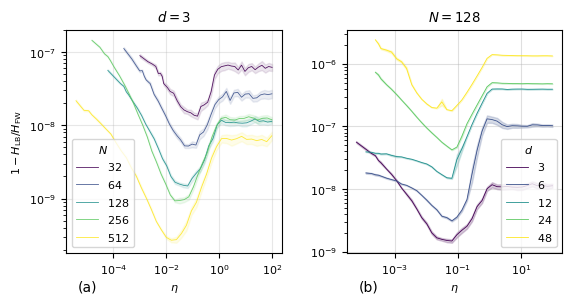

In [10]:
#plot relative optimal gap in FW
matplotlib.rcParams.update({'text.usetex': usetex,'font.size': 8})
fig, axes = plt.subplots(1, 2, figsize=(6.4, 2.9),gridspec_kw={'wspace': 0.3})
x_to_plot= 'eta'#'MlogN/Nd'#'avg_edge_traf_int_FW'#
y_to_plot= 'rel_opt_gap'#'avg_traf_int_FW'#'avg_traf_int_FW'#'rel_en_diff_intFW_FW'#'frac_shortest_paths'#'avg_traf_int_paths'#'frac_int_paths'#'rel_opt_gap'#'RGAP'#'sup_paths_od_degen_rtol_1e-3'#'avg_degen_od_FW'#'avg_traf_int_paths' #'frac_shortest_paths'#'frac_int_paths'#'rel_opt_gap'#'RGAP'#'en_gain_intFW_SP' #'avg_traf_shortest_paths'
y_to_plot2= ''#'rel_en_diff_intFW_FW'#'frac_shortest_paths'#'avg_traf_int_paths'#'frac_int_paths'#'rel_opt_gap'#'RGAP'#'sup_paths_od_degen_rtol_1e-3'#'avg_degen_od_FW'#'avg_traf_int_paths' #'frac_shortest_paths'#'frac_int_paths'#'rel_opt_gap'#'RGAP'#'en_gain_intFW_SP' #'avg_traf_shortest_paths'

d=3
linewidth=0.6 
df1=df_mean_std[(df_mean_std['d']==d)]
maxN=max(df1['N'].unique().tolist())
minN=min(df1['N'].unique().tolist())
errorbars=False
shaded_errors=True
colormap = cm.viridis
norm = plt.Normalize(vmin=np.log(minN), vmax=np.log(maxN))
for N in df1['N'].unique().tolist():
    df_sel=df1[df1['N']==N]
    df_sel= df_sel.sort_values(by=x_to_plot)
    color = colormap(norm(np.log(N)))
    if(errorbars):
        axes[0].errorbar(df_sel[x_to_plot],df_sel[y_to_plot],alpha=0.9,c=color,label=f"N={int(N)}",yerr=df_sel[y_to_plot+'_std'],capsize=2,lw=linewidth)
        if(y_to_plot2!=''):
            axes[0].errorbar(df_sel[x_to_plot],df_sel[y_to_plot2],alpha=0.9,c=color,yerr=df_sel[y_to_plot+'_std'],capsize=1,lw=linewidth)


    else:
        axes[0].plot(df_sel[x_to_plot],df_sel[y_to_plot],alpha=0.9,c=color,label=rf"${int(N)}$",lw=linewidth)
        if(y_to_plot2!=''):
            axes[0].plot(df_sel[x_to_plot],df_sel[y_to_plot2],alpha=0.9,c=color,lw=linewidth)
        if shaded_errors:
            axes[0].fill_between(df_sel[x_to_plot],(df_sel[y_to_plot]-df_sel[y_to_plot+'_std']),(df_sel[y_to_plot]+df_sel[y_to_plot+'_std']),color=color,alpha=0.1)
            if(y_to_plot2!=''):
                axes[0].fill_between(df_sel[x_to_plot],(df_sel[y_to_plot2]-df_sel[y_to_plot2+'_std']),(df_sel[y_to_plot2]+df_sel[y_to_plot2+'_std']),color=color,alpha=0.1)
axes[0].grid(alpha=0.3)
axes[0].set_xlabel(r"$\eta$")
axes[0].set_ylabel(r"$1-H_\mathrm{LB}/H_\mathrm{FW}$ ")
#axes[0].set_ylabel(r"$1-$ Fraction of TAP integer paths")
axes[0].legend(title=r"$N$")
axes[0].set_yscale('log')
axes[0].set_xscale('log')
#axes[0].set_ylim([0.97,1.35])
#axes[0].set_xlim([5e-5,2e2])
#axes[0].set_xlim([1e-1,1000])
#axes[0].set_ylim([1e-1,100])
axes[0].text(0.1, -0.15, "(a)", ha='center', va='center', transform=axes[0].transAxes, fontsize=10)
axes[0].set_title(r"$d=3$")



###RIGHT PLOT###

x_to_plot= 'eta'#'rho'#'avg_edge_traf_int_FW'#'MlogNlogd/Nd'#
y_to_plot= 'rel_opt_gap'#'avg_traf_int_FW'#'frac_shortest_paths'#'avg_traf_int_paths'#'frac_int_paths'#'rel_opt_gap'#'RGAP'#'sup_paths_od_degen_rtol_1e-3'#'avg_degen_od_FW'#'avg_traf_int_paths' #'frac_shortest_paths'#'frac_int_paths'#'rel_opt_gap'#'RGAP'#'en_gain_intFW_SP' #'avg_traf_shortest_paths'
N=128
df1=df_mean_std[(df_mean_std['N']==N)]
maxd=max(df1['d'].unique().tolist())
mind=min(df1['d'].unique().tolist())
shaded_errors=True
errorbars=False
colormap = cm.viridis
norm = plt.Normalize(vmin=np.log(mind), vmax=np.log(maxd))

# Map the color value to a color using the colormap
for d in df1['d'].unique().tolist():
    df_sel=df1[df1['d']==d]
    df_sel= df_sel.sort_values(by=x_to_plot)
    color = colormap(norm(np.log(d)))
    
    if(errorbars):
        axes[1].errorbar(df_sel[x_to_plot],df_sel[y_to_plot],alpha=0.9,c=color,label=f"d={d}",yerr=df_sel[y_to_plot+'_std'],capsize=1,lw=linewidth)
    else:
        axes[1].plot(df_sel[x_to_plot],df_sel[y_to_plot],alpha=1,c=color,label=rf"${int(d)}$",lw=linewidth)
        if shaded_errors:
            axes[1].fill_between(df_sel[x_to_plot],(df_sel[y_to_plot]-df_sel[y_to_plot+'_std']),(df_sel[y_to_plot]+df_sel[y_to_plot+'_std']),color=color,alpha=0.2)
axes[1].grid(alpha=0.4)
axes[1].set_xlabel(r"$\eta$")

axes[1].set_ylabel(r" ")
#axes[1].set_ylabel("Fraction of rerouted flow")
plt.legend(title=r"$d$")
axes[1].set_xscale('log')
axes[1].set_yscale('log')
#axes[1].set_xlim([1e-1,1000])
#axes[1].set_ylim([1e-1,100])

axes[1].text(0.1, -0.15, "(b)", ha='center', va='center', transform=axes[1].transAxes, fontsize=10)
axes[1].set_title(r"$N=128$")

plt.savefig('./results/pics/rel_opt_gap_FW.pdf',bbox_inches='tight',dpi=600)


In [11]:
# L experiments with very high M and gamma=0.5
#N=128, d=3,6,12,24,48
#d=3, N=32,64,128,256,512
df_load=pd.read_csv("results/state_exp_highM_3_gamma_05.txt", header=0,index_col=False, sep=' ')
df_load.drop(columns='identifier',inplace=True)

df_load['en_gain_FW_SP']=1-df_load['FW_fin_energy']/df_load['shortest_path_energy']
df_load['en_diff_intFW_FW']=df_load['int_FW_path_energy']-df_load['FW_fin_energy']
df_load['rel_en_diff_intFW_FW']=df_load['int_FW_path_energy']/df_load['FW_fin_energy']-1
df_load['eta']=df_load['M']/(df_load['N']*(df_load['N']-1))
df_load['en_gain_intFW_SP']=1-df_load['int_FW_path_energy']/df_load['shortest_path_energy']
df_load['M/Nd']=df_load['M']/(df_load['N']*df_load['d'])
df_load['rho']=2*df_load['M/Nd']*np.log(df_load['N'])/(np.log(df_load['d']))
df_load['intFW_avg_flow_over_rho']=df_load['avg_traf_int_FW']/df_load['rho']
df_load['rel_opt_gap']=df_load['FW_fin_opt_gap']/df_load['FW_fin_energy']

df_mean_std=calculate_mean_std_mean(df_load, group_columns=["N", "M", "gamma", "d"])


## Figure 13
### showing agreement between $\rho=2M\log N/(Nd\log d)$ and the average flow per edge in RITAP for $\gamma=0.5$
figure in appendix with RRG, Randomly uniform OD pairs, gamma=0.5

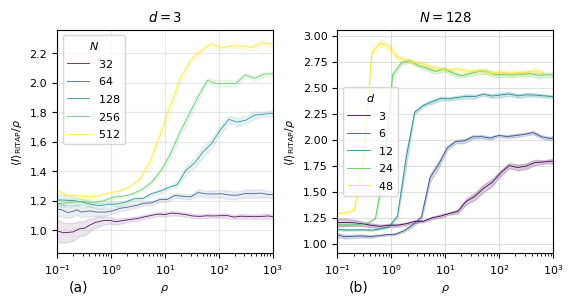

In [12]:
#plot of agreement of rho with the average flow per edge in RITAP
matplotlib.rcParams.update({'text.usetex': usetex,'font.size': 8})
fig, axes = plt.subplots(1, 2, figsize=(6.4, 2.9),gridspec_kw={'wspace': 0.3})
x_to_plot= 'rho'#'MlogN/Nd'#'avg_edge_traf_int_FW'#
y_to_plot= 'intFW_avg_flow_over_rho'#'avg_traf_int_FW'#'avg_traf_int_FW'#'rel_en_diff_intFW_FW'#'frac_shortest_paths'#'avg_traf_int_paths'#'frac_int_paths'#'rel_opt_gap'#'RGAP'#'sup_paths_od_degen_rtol_1e-3'#'avg_degen_od_FW'#'avg_traf_int_paths' #'frac_shortest_paths'#'frac_int_paths'#'rel_opt_gap'#'RGAP'#'en_gain_intFW_SP' #'avg_traf_shortest_paths'
y_to_plot2= ''#'rel_en_diff_intFW_FW'#'frac_shortest_paths'#'avg_traf_int_paths'#'frac_int_paths'#'rel_opt_gap'#'RGAP'#'sup_paths_od_degen_rtol_1e-3'#'avg_degen_od_FW'#'avg_traf_int_paths' #'frac_shortest_paths'#'frac_int_paths'#'rel_opt_gap'#'RGAP'#'en_gain_intFW_SP' #'avg_traf_shortest_paths'

d=3
linewidth=0.6 
df1=df_mean_std[(df_mean_std['d']==d)]
maxN=max(df1['N'].unique().tolist())
minN=min(df1['N'].unique().tolist())
errorbars=False
shaded_errors=True
colormap = cm.viridis
norm = plt.Normalize(vmin=np.log(minN), vmax=np.log(maxN))
for N in df1['N'].unique().tolist():
    df_sel=df1[df1['N']==N]
    df_sel= df_sel.sort_values(by=x_to_plot)
    color = colormap(norm(np.log(N)))
    if(errorbars):
        axes[0].errorbar(df_sel[x_to_plot],df_sel[y_to_plot],alpha=0.9,c=color,label=f"N={int(N)}",yerr=df_sel[y_to_plot+'_std'],capsize=2,lw=linewidth)
        if(y_to_plot2!=''):
            axes[0].errorbar(df_sel[x_to_plot],df_sel[y_to_plot2],alpha=0.9,c=color,yerr=df_sel[y_to_plot+'_std'],capsize=1,lw=linewidth)


    else:
        axes[0].plot(df_sel[x_to_plot],df_sel[y_to_plot],alpha=0.9,c=color,label=rf"${int(N)}$",lw=linewidth)
        if(y_to_plot2!=''):
            axes[0].plot(df_sel[x_to_plot],df_sel[y_to_plot2],alpha=0.9,c=color,lw=linewidth)
        if shaded_errors:
            axes[0].fill_between(df_sel[x_to_plot],(df_sel[y_to_plot]-df_sel[y_to_plot+'_std']),(df_sel[y_to_plot]+df_sel[y_to_plot+'_std']),color=color,alpha=0.1)
            if(y_to_plot2!=''):
                axes[0].fill_between(df_sel[x_to_plot],(df_sel[y_to_plot2]-df_sel[y_to_plot2+'_std']),(df_sel[y_to_plot2]+df_sel[y_to_plot2+'_std']),color=color,alpha=0.1)
axes[0].grid(alpha=0.3)
axes[0].set_xlabel(r"$\rho$")
axes[0].set_ylabel(r"$\langle I\rangle_\mathrm{RITAP}/\rho$")
#axes[0].set_ylabel(r"$1-$ Fraction of TAP integer paths")
axes[0].legend(title=r"$N$")
#axes[0].set_yscale('log')
axes[0].set_xscale('log')
#axes[0].set_ylim([0.97,1.35])
#axes[0].set_xlim([5e-5,2e2])
axes[0].set_xlim([1e-1,1000])
#axes[0].set_ylim([1e-1,100])
axes[0].text(0.1, -0.15, "(a)", ha='center', va='center', transform=axes[0].transAxes, fontsize=10)
axes[0].set_title(r"$d=3$")



###RIGHT PLOT###

x_to_plot= 'rho'#'rho'#'avg_edge_traf_int_FW'#'MlogNlogd/Nd'#
y_to_plot= 'intFW_avg_flow_over_rho'#'avg_traf_int_FW'#'frac_shortest_paths'#'avg_traf_int_paths'#'frac_int_paths'#'rel_opt_gap'#'RGAP'#'sup_paths_od_degen_rtol_1e-3'#'avg_degen_od_FW'#'avg_traf_int_paths' #'frac_shortest_paths'#'frac_int_paths'#'rel_opt_gap'#'RGAP'#'en_gain_intFW_SP' #'avg_traf_shortest_paths'
N=128
df1=df_mean_std[(df_mean_std['N']==N)]
maxd=max(df1['d'].unique().tolist())
mind=min(df1['d'].unique().tolist())
shaded_errors=True
errorbars=False
colormap = cm.viridis
norm = plt.Normalize(vmin=np.log(mind), vmax=np.log(maxd))

# Map the color value to a color using the colormap
for d in df1['d'].unique().tolist():
    df_sel=df1[df1['d']==d]
    df_sel= df_sel.sort_values(by=x_to_plot)
    color = colormap(norm(np.log(d)))
    
    if(errorbars):
        axes[1].errorbar(df_sel[x_to_plot],df_sel[y_to_plot],alpha=0.9,c=color,label=f"d={d}",yerr=df_sel[y_to_plot+'_std'],capsize=1,lw=linewidth)
    else:
        axes[1].plot(df_sel[x_to_plot],df_sel[y_to_plot],alpha=1,c=color,label=rf"${int(d)}$",lw=linewidth)
        if shaded_errors:
            axes[1].fill_between(df_sel[x_to_plot],(df_sel[y_to_plot]-df_sel[y_to_plot+'_std']),(df_sel[y_to_plot]+df_sel[y_to_plot+'_std']),color=color,alpha=0.2)
axes[1].grid(alpha=0.4)
axes[1].set_xlabel(r"$\rho$")

axes[1].set_ylabel(r"$\langle I\rangle_\mathrm{RITAP}/\rho$ ")
#axes[1].set_ylabel("Fraction of rerouted flow")
plt.legend(title=r"$d$")
axes[1].set_xscale('log')
#axes[1].set_yscale('log')
axes[1].set_xlim([1e-1,1000])
#axes[1].set_ylim([1e-1,100])

axes[1].text(0.1, -0.15, "(b)", ha='center', va='center', transform=axes[1].transAxes, fontsize=10)
axes[1].set_title(r"$N=128$")

plt.savefig('./results/pics/rho_vs_avg_flow_ritap_gamma05.pdf',bbox_inches='tight',dpi=600)


In [13]:
# W experiemnts on BPR phi'(x)=(1+0.15x^4),repeating experiemnts in I, this time with correct computation of support paths. THis corresponds to an user equilibrium for phi' or to a system optimum for its integral.
#N=128, d=3,6,12
#d=3, N=32,64,128,256
df_load=pd.read_csv("results/state_exp_undirected_RRG_BPR_cap1_gamma4.txt", header=0,index_col=False, sep=' ')
df_load.drop(columns='identifier',inplace=True)

df_load['en_gain_FW_SP']=1-df_load['FW_fin_energy']/df_load['shortest_path_energy']
df_load['en_diff_intFW_FW']=df_load['int_FW_path_energy']-df_load['FW_fin_energy']
df_load['rel_en_diff_intFW_FW']=df_load['int_FW_path_energy']/df_load['FW_fin_energy']-1
df_load['eta']=df_load['M']/(df_load['N']*(df_load['N']-1))
df_load['en_gain_intFW_SP']=1-df_load['int_FW_path_energy']/df_load['shortest_path_energy']
df_load['M/Nd']=df_load['M']/(df_load['N']*df_load['d'])
df_load['rho']=2*df_load['M/Nd']*np.log(df_load['N'])/(np.log(df_load['d']))
df_load['intFW_avg_flow_over_rho']=df_load['avg_traf_int_FW']/df_load['rho']
df_load['rel_opt_gap']=df_load['FW_fin_opt_gap']/df_load['FW_fin_energy']

df_mean_std=calculate_mean_std_mean(df_load, group_columns=["N", "M", "gamma", "d"])

## Figure 11
### showing convergence of TAP to ITAP for BPR nonlinearity
figure in appendix with directed RRG d=6 (graph is directed but edges are symmetrical, meaning either none or both of $i\to j$ and $j\to i$ are present). Randomly uniform OD pairs, BPR nonlinearity $\phi'(x)=1+0.038 x^4$


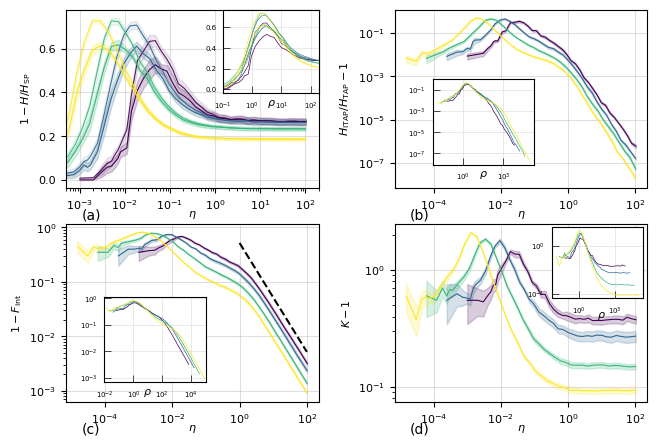

In [14]:
#2x2 plots of dependence on N of FW/RITAP gap, Fint, degen.
#plots for BPR nonlinearity cap=1
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

#2x2 plots of dependence on N of FW/RITAP gap, Fint, degen.
#plots for BPR nonlinearity
matplotlib.rcParams.update({'text.usetex': usetex,'font.size': 8})
fig, axes = plt.subplots(2, 2, figsize=(7.5,5.1),gridspec_kw={'wspace': 0.3})   
x_to_plot='eta'
x_to_plot_inset='rho'
###UPPER LEFT####
linewidth=0.8
linewidth_inset=0.5
font_size_inset=5
y_to_plot= 'en_gain_intFW_SP'#'rel_en_diff_intFW_FW'#'frac_shortest_paths'#'avg_traf_int_paths'#'frac_int_paths'#'rel_opt_gap'#'RGAP'#'sup_paths_od_degen_rtol_1e-3'#'avg_degen_od_FW'#'avg_traf_int_paths' #'frac_shortest_paths'#'frac_int_paths'#'rel_opt_gap'#'RGAP'#'en_gain_intFW_SP' #'avg_traf_shortest_paths'
y_to_plot2= 'en_gain_FW_SP'#'rel_en_diff_intFW_FW'#'frac_shortest_paths'#'avg_traf_int_paths'#'frac_int_paths'#'rel_opt_gap'#'RGAP'#'sup_paths_od_degen_rtol_1e-3'#'avg_degen_od_FW'#'avg_traf_int_paths' #'frac_shortest_paths'#'frac_int_paths'#'rel_opt_gap'#'RGAP'#'en_gain_intFW_SP' #'avg_traf_shortest_paths'
d=3
df1=df_mean_std[(df_mean_std['d']==d)]
maxN=max(df1['N'].unique().tolist())
minN=min(df1['N'].unique().tolist())
shaded_errors=True
errorbars=False
colormap = cm.viridis
norm = plt.Normalize(vmin=np.log(minN), vmax=np.log(maxN))

ax_inset = inset_axes(axes[0, 0], width="40%", height="40%", loc='lower left', bbox_to_anchor=(0.6, 0.5, 0.95, 1.17),bbox_transform=axes[0,0].transAxes)
# Map the color value to a color using the colormap
for N in df1['N'].unique().tolist():
    df_sel=df1[df1['N']==N]
    df_sel= df_sel.sort_values(by=x_to_plot)
    color = colormap(norm(np.log(N)))
    
    if(errorbars):
        axes[0,0].errorbar(df_sel[x_to_plot],df_sel[y_to_plot],alpha=0.9,c=color,label=f"{N}",yerr=df_sel[y_to_plot+'_std'],capsize=1,lw=linewidth)
        ax_inset.errorbar(df_sel[x_to_plot_inset],df_sel[y_to_plot],alpha=0.9,c=color,label=f"{N}",yerr=df_sel[y_to_plot+'_std'],capsize=1,lw=linewidth)

    else:
        axes[0,0].plot(df_sel[x_to_plot],df_sel[y_to_plot],alpha=1,c=color,label=f"${N}$",lw=linewidth)
        ax_inset.plot(df_sel[x_to_plot_inset],df_sel[y_to_plot],alpha=1,c=color,label=f"${N}$",lw=linewidth_inset)

        if(y_to_plot2!=''):
            axes[0,0].plot(df_sel[x_to_plot],df_sel[y_to_plot2],alpha=0.9,c=color,lw=linewidth)
            ax_inset.plot(df_sel[x_to_plot_inset],df_sel[y_to_plot2],alpha=0.9,c=color,lw=linewidth_inset)

        if shaded_errors:
            axes[0,0].fill_between(df_sel[x_to_plot],(df_sel[y_to_plot]-df_sel[y_to_plot+'_std']),(df_sel[y_to_plot]+df_sel[y_to_plot+'_std']),color=color,alpha=0.2)
            #ax_inset.fill_between(df_sel[x_to_plot_inset],(df_sel[y_to_plot]-df_sel[y_to_plot+'_std']),(df_sel[y_to_plot]+df_sel[y_to_plot+'_std']),color=color,alpha=0.2)

            if(y_to_plot2!=''):
                axes[0,0].fill_between(df_sel[x_to_plot],(df_sel[y_to_plot2]-df_sel[y_to_plot2+'_std']),(df_sel[y_to_plot2]+df_sel[y_to_plot2+'_std']),color=color,alpha=0.1)
                #ax_inset.fill_between(df_sel[x_to_plot_inset],(df_sel[y_to_plot2]-df_sel[y_to_plot2+'_std']),(df_sel[y_to_plot2]+df_sel[y_to_plot2+'_std']),color=color,alpha=0.1)

axes[0,0].grid(alpha=0.4)
axes[0,0].set_xlabel(r"$\eta$")
axes[0,0].set_ylabel("$1-H/H_\mathrm{SP}$")

ax_inset.set_xscale('log')
ax_inset.grid(alpha=0.4,linewidth=linewidth_inset)
ax_inset.tick_params(labelsize=font_size_inset) 
ax_inset.set_xlabel(r"$\rho$",labelpad=-10)
ax_inset.tick_params(axis='x', direction='in', length=5, width=linewidth_inset, pad=5)
ax_inset.tick_params(axis='y', direction='in', length=5, width=linewidth_inset, pad=5)
ax_inset.set_xlim([1e-1,200])

ax_inset.minorticks_off()
#ax_inset.set_ylim([1e-2,1.9e-1])
axes[0,0].grid(alpha=0.4)
axes[0,0].set_xlabel(r"$\eta$",labelpad=-2)

axes[0,0].set_ylabel("$1-H/H_\mathrm{SP}$")
axes[0,0].set_xscale('log')
axes[0,0].set_xlim([5e-4,2e2])
#axes[0,0].set_ylim([1e-2,1.7e-1])

axes[0,0].text(0.1, -0.15, "(a)", ha='center', va='center', transform=axes[0,0].transAxes, fontsize=10)

##################
###UPPER RIGHT####
##################

y_to_plot= 'rel_en_diff_intFW_FW'#'frac_shortest_paths'#'avg_traf_int_paths'#'frac_int_paths'#'rel_opt_gap'#'RGAP'#'sup_paths_od_degen_rtol_1e-3'#'avg_degen_od_FW'#'avg_traf_int_paths' #'frac_shortest_paths'#'frac_int_paths'#'rel_opt_gap'#'RGAP'#'en_gain_intFW_SP' #'avg_traf_shortest_paths'
y_to_plot2= ''#'rel_en_diff_intFW_FW'#'frac_shortest_paths'#'avg_traf_int_paths'#'frac_int_paths'#'rel_opt_gap'#'RGAP'#'sup_paths_od_degen_rtol_1e-3'#'avg_degen_od_FW'#'avg_traf_int_paths' #'frac_shortest_paths'#'frac_int_paths'#'rel_opt_gap'#'RGAP'#'en_gain_intFW_SP' #'avg_traf_shortest_paths'
df1=df_mean_std[(df_mean_std['d']==d)]
maxN=max(df1['N'].unique().tolist())
minN=min(df1['N'].unique().tolist())
shaded_errors=True
errorbars=False
colormap = cm.viridis
norm = plt.Normalize(vmin=np.log(minN), vmax=np.log(maxN))
ax_inset = inset_axes(axes[0, 1], width="40%", height="40%", loc='lower left', bbox_to_anchor=(0.13, 0.1, 1, 1.2),bbox_transform=axes[0,1].transAxes)
# Map the color value to a color using the colormap
for N in df1['N'].unique().tolist():
    df_sel=df1[df1['N']==N]
    df_sel= df_sel.sort_values(by=x_to_plot)
    color = colormap(norm(np.log(N)))
    
    if(errorbars):
        axes[0,1].errorbar(df_sel[x_to_plot],df_sel[y_to_plot],alpha=0.9,c=color,label=f"{N}",yerr=df_sel[y_to_plot+'_std'],capsize=1,lw=linewidth)
        ax_inset.errorbar(df_sel[x_to_plot_inset],df_sel[y_to_plot],alpha=0.9,c=color,label=f"{N}",yerr=df_sel[y_to_plot+'_std'],capsize=1,lw=linewidth)

    else:
        axes[0,1].plot(df_sel[x_to_plot],df_sel[y_to_plot],alpha=1,c=color,label=f"${N}$",lw=linewidth)
        ax_inset.plot(df_sel[x_to_plot_inset],df_sel[y_to_plot],alpha=1,c=color,label=f"${N}$",lw=linewidth_inset)

        if(y_to_plot2!=''):
            axes[0,1].plot(df_sel[x_to_plot],df_sel[y_to_plot2],alpha=0.9,c=color,lw=linewidth)
            ax_inset.plot(df_sel[x_to_plot_inset],df_sel[y_to_plot2],alpha=0.9,c=color,lw=linewidth_inset)

        if shaded_errors:
            axes[0,1].fill_between(df_sel[x_to_plot],(df_sel[y_to_plot]-df_sel[y_to_plot+'_std']),(df_sel[y_to_plot]+df_sel[y_to_plot+'_std']),color=color,alpha=0.2)
            #ax_inset.fill_between(df_sel[x_to_plot_inset],(df_sel[y_to_plot]-df_sel[y_to_plot+'_std']),(df_sel[y_to_plot]+df_sel[y_to_plot+'_std']),color=color,alpha=0.2)

            if(y_to_plot2!=''):
                axes[0,1].fill_between(df_sel[x_to_plot],(df_sel[y_to_plot2]-df_sel[y_to_plot2+'_std']),(df_sel[y_to_plot2]+df_sel[y_to_plot2+'_std']),color=color,alpha=0.1)
                #ax_inset.fill_between(df_sel[x_to_plot_inset],(df_sel[y_to_plot2]-df_sel[y_to_plot2+'_std']),(df_sel[y_to_plot2]+df_sel[y_to_plot2+'_std']),color=color,alpha=0.1)

axes[0,1].grid(alpha=0.4)
axes[0,1].set_xlabel(r"$\eta$",labelpad=-2)

axes[0,1].set_ylabel("$H_\mathrm{ITAP}/H_\mathrm{TAP}-1$")
#axes[1].set_ylabel("Fraction of rerouted flow")
axes[0,1].set_xscale('log')
axes[0,1].set_yscale('log')
#axes[1].set_xlim([1e-1,1000])
#axes[1].set_ylim([1e-1,100])

axes[0,1].text(0.1, -0.15, "(b)", ha='center', va='center', transform=axes[0,1].transAxes, fontsize=10)

ax_inset.set_xscale('log')
ax_inset.set_yscale('log')
ax_inset.grid(alpha=0.4,linewidth=linewidth_inset)
ax_inset.tick_params(labelsize=font_size_inset) 
ax_inset.set_xlabel(r"$\rho$",labelpad=-10)
ax_inset.tick_params(axis='x', direction='in', length=5, width=linewidth_inset, pad=5)
ax_inset.tick_params(axis='y', direction='in', length=5, width=linewidth_inset, pad=5)
ax_inset.minorticks_off()

##################
###LOWER LEFT####
##################


y_to_plot= 'frac_integer_paths_tol_1e-04'#'frac_shortest_paths'#'avg_traf_int_paths'#'frac_int_paths'#'rel_opt_gap'#'RGAP'#'sup_paths_od_degen_rtol_1e-3'#'avg_degen_od_FW'#'avg_traf_int_paths' #'frac_shortest_paths'#'frac_int_paths'#'rel_opt_gap'#'RGAP'#'en_gain_intFW_SP' #'avg_traf_shortest_paths'
y_to_plot2= ''#'rel_en_diff_intFW_FW'#'frac_shortest_paths'#'avg_traf_int_paths'#'frac_int_paths'#'rel_opt_gap'#'RGAP'#'sup_paths_od_degen_rtol_1e-3'#'avg_degen_od_FW'#'avg_traf_int_paths' #'frac_shortest_paths'#'frac_int_paths'#'rel_opt_gap'#'RGAP'#'en_gain_intFW_SP' #'avg_traf_shortest_paths'
N=128
df1=df_mean_std[(df_mean_std['d']==d)]
maxN=max(df1['N'].unique().tolist())
minN=min(df1['N'].unique().tolist())
shaded_errors=True
errorbars=False
colormap = cm.viridis
norm = plt.Normalize(vmin=np.log(minN), vmax=np.log(maxN))

ax_inset = inset_axes(axes[1,0], width="40%", height="40%", loc='lower left', bbox_to_anchor=(0.13, 0.08, 1, 1.2),bbox_transform=axes[1,0].transAxes)
# Map the color value to a color using the colormap
for N in df1['N'].unique().tolist():
    df_sel=df1[df1['N']==N]
    df_sel= df_sel.sort_values(by=x_to_plot)
    color = colormap(norm(np.log(N)))
    
    if(errorbars):
        axes[1,0].errorbar(df_sel[x_to_plot],1-df_sel[y_to_plot],alpha=0.9,c=color,label=f"{N}",yerr=df_sel[y_to_plot+'_std'],capsize=1,lw=linewidth)
        ax_inset.errorbar(df_sel[x_to_plot_inset],1-df_sel[y_to_plot],alpha=0.9,c=color,label=f"{N}",yerr=df_sel[y_to_plot+'_std'],capsize=1,lw=linewidth)

    else:
        axes[1,0].plot(df_sel[x_to_plot],1-df_sel[y_to_plot],alpha=1,c=color,label=f"${N}$",lw=linewidth)
        ax_inset.plot(df_sel[x_to_plot_inset],1-df_sel[y_to_plot],alpha=1,c=color,label=f"${N}$",lw=linewidth_inset)

        if(y_to_plot2!=''):
            axes[1,0].plot(df_sel[x_to_plot],1-df_sel[y_to_plot2],alpha=0.9,c=color,lw=linewidth)
            ax_inset.plot(df_sel[x_to_plot_inset],1-df_sel[y_to_plot2],alpha=0.9,c=color,lw=linewidth_inset)

        if shaded_errors:
            axes[1,0].fill_between(df_sel[x_to_plot],1-(df_sel[y_to_plot]-df_sel[y_to_plot+'_std']),1-(df_sel[y_to_plot]+df_sel[y_to_plot+'_std']),color=color,alpha=0.2)
            #ax_inset.fill_between(df_sel[x_to_plot_inset],1-(df_sel[y_to_plot]-df_sel[y_to_plot+'_std']),1-(df_sel[y_to_plot]+df_sel[y_to_plot+'_std']),color=color,alpha=0.2)

            if(y_to_plot2!=''):
                axes[1,0].fill_between(df_sel[x_to_plot],1-(df_sel[y_to_plot2]-df_sel[y_to_plot2+'_std']),1-(df_sel[y_to_plot2]+df_sel[y_to_plot2+'_std']),color=color,alpha=0.1)
                #ax_inset.fill_between(df_sel[x_to_plot_inset],1-(df_sel[y_to_plot2]-df_sel[y_to_plot2+'_std']),1-(df_sel[y_to_plot2]+df_sel[y_to_plot2+'_std']),color=color,alpha=0.1)

                
                
ax_inset.set_xscale('log')
ax_inset.set_yscale('log')
ax_inset.grid(alpha=0.4,linewidth=linewidth_inset)
ax_inset.tick_params(labelsize=font_size_inset) 
ax_inset.set_xlabel(r"$\rho$",labelpad=-10,)
ax_inset.tick_params(axis='x', direction='in', length=5, width=linewidth_inset, pad=5)
ax_inset.tick_params(axis='y', direction='in', length=5, width=linewidth_inset, pad=5)
ax_inset.minorticks_off()
ax_inset.set_xlim([1e-2,1e5])
ax_inset.xaxis.set_label_coords(.43, -.05)



axes[1,0].grid(alpha=0.4)
axes[1,0].set_xlabel(r"$\eta$",labelpad=-2)

axes[1,0].set_ylabel("$1-F_\mathrm{int}$")
#axes[1].set_ylabel("Fraction of rerouted flow")
axes[1,0].set_xscale('log')
axes[1,0].set_yscale('log')
#axes[1].set_xlim([1e-1,1000])
#axes[1].set_ylim([1e-1,100])

axes[1,0].text(0.1, -0.15, "(c)", ha='center', va='center', transform=axes[1,0].transAxes, fontsize=10)
xlin=np.linspace(1,100,100)
power_law=0.52/xlin
axes[1,0].plot(xlin,power_law, color='black',ls='--')


##################
###LOWER RIGHT####
##################

y_to_plot= 'sup_paths_od_degen_rtol_1e-5'#'frac_shortest_paths'#'avg_traf_int_paths'#'frac_int_paths'#'rel_opt_gap'#'RGAP'#'sup_paths_od_degen_rtol_1e-3'#'avg_degen_od_FW'#'avg_traf_int_paths' #'frac_shortest_paths'#'frac_int_paths'#'rel_opt_gap'#'RGAP'#'en_gain_intFW_SP' #'avg_traf_shortest_paths'
y_to_plot2= ''#'rel_en_diff_intFW_FW'#'frac_shortest_paths'#'avg_traf_int_paths'#'frac_int_paths'#'rel_opt_gap'#'RGAP'#'sup_paths_od_degen_rtol_1e-3'#'avg_degen_od_FW'#'avg_traf_int_paths' #'frac_shortest_paths'#'frac_int_paths'#'rel_opt_gap'#'RGAP'#'en_gain_intFW_SP' #'avg_traf_shortest_paths'
N=128
df1=df_mean_std[(df_mean_std['d']==d)]
maxN=max(df1['N'].unique().tolist())
minN=min(df1['N'].unique().tolist())
shaded_errors=True
errorbars=False
colormap = cm.viridis
norm = plt.Normalize(vmin=np.log(minN), vmax=np.log(maxN))

ax_inset = inset_axes(axes[1,1], width="40%", height="40%", loc='lower left', bbox_to_anchor=(0.6, 0.55, 0.9, 1),bbox_transform=axes[1,1].transAxes)
# Map the color value to a color using the colormap
for N in df1['N'].unique().tolist():
    df_sel=df1[df1['N']==N]
    df_sel= df_sel.sort_values(by=x_to_plot)
    color = colormap(norm(np.log(N)))
    
    if(errorbars):
        axes[1,1].errorbar(df_sel[x_to_plot],df_sel[y_to_plot]-1,alpha=0.9,c=color,label=f"{N}",yerr=df_sel[y_to_plot+'_std'],capsize=1,lw=linewidth)
        ax_inset.errorbar(df_sel[x_to_plot_inset],df_sel[y_to_plot]-1,alpha=0.9,c=color,label=f"{N}",yerr=df_sel[y_to_plot+'_std'],capsize=1,lw=linewidth)

    else:
        axes[1,1].plot(df_sel[x_to_plot],df_sel[y_to_plot]-1,alpha=1,c=color,label=f"${N}$",lw=linewidth)
        ax_inset.plot(df_sel[x_to_plot_inset],df_sel[y_to_plot]-1,alpha=1,c=color,label=f"${N}$",lw=linewidth_inset)

        if(y_to_plot2!=''):
            axes[1,1].plot(df_sel[x_to_plot],df_sel[y_to_plot2]-1,alpha=0.9,c=color,lw=linewidth)
            #ax_inset.plot(df_sel[x_to_plot_inset],df_sel[y_to_plot2]-1,alpha=0.9,c=color,lw=linewidth_inset)

        if shaded_errors:
            axes[1,1].fill_between(df_sel[x_to_plot],(df_sel[y_to_plot]-df_sel[y_to_plot+'_std'])-1,(df_sel[y_to_plot]+df_sel[y_to_plot+'_std'])-1,color=color,alpha=0.2)
            #ax_inset.fill_between(df_sel[x_to_plot_inset],(df_sel[y_to_plot]-df_sel[y_to_plot+'_std'])-1,(df_sel[y_to_plot]+df_sel[y_to_plot+'_std'])-1,color=color,alpha=0.2)

            if(y_to_plot2!=''):
                axes[1,1].fill_between(df_sel[x_to_plot],(df_sel[y_to_plot2]-df_sel[y_to_plot2+'_std'])-1,(df_sel[y_to_plot2]+df_sel[y_to_plot2+'_std'])-1,color=color,alpha=0.1)
                #ax_inset.fill_between(df_sel[x_to_plot_inset],(df_sel[y_to_plot2]-df_sel[y_to_plot2+'_std'])-1,(df_sel[y_to_plot2]+df_sel[y_to_plot2+'_std'])-1,color=color,alpha=0.1)

                
                
ax_inset.set_xscale('log')
ax_inset.set_yscale('log')
ax_inset.grid(alpha=0.4,linewidth=linewidth_inset)
ax_inset.tick_params(labelsize=font_size_inset) 
ax_inset.set_xlabel(r"$\rho$",labelpad=-10,horizontalalignment='right')
ax_inset.tick_params(axis='x', direction='in', length=5, width=linewidth_inset, pad=5)
ax_inset.tick_params(axis='y', direction='in', length=5, width=linewidth_inset, pad=5)
ax_inset.minorticks_off()
ax_inset.xaxis.set_label_coords(.6, -.15)


axes[1,1].grid(alpha=0.4)
axes[1,1].set_xlabel(r"$\eta$",labelpad=-2)

axes[1,1].set_ylabel("$K-1$")
#axes[1].set_ylabel("Fraction of rerouted flow")
axes[1,1].set_xscale('log')
axes[1,1].set_yscale('log')


axes[1,1].text(0.1, -0.15, "(d)", ha='center', va='center', transform=axes[1,1].transAxes, fontsize=10)

plt.savefig('./results/pics/TAP_ITAP_conv_BPR_inset.pdf',bbox_inches='tight',dpi=600)


In [15]:
# AA RITAP experiments on Anaheim and Eastern Massachussets merged together. 
#this is given by just loading the data from Z, T

#with random OD pairs, gamma=2. 10 seeds higher tmax, M up to 100N^2, N=416,74, used
# Anaheim uses a different method from V to compute the number of shortest paths. The method is based on just looking at how many paths are there in the FW solution

df_load1=pd.read_csv("results/state_Anaheim_gamma2_3rdtry_final_new.txt", header=0,index_col=False, sep=' ')
df_load1.drop(columns='identifier',inplace=True)
for x in [2,3,4,5,6,9]:
    df_load1[f"proxy_degen_sup_paths_tol_1e-{x}"]=df_load1[f'tot_num_tap_paths_tol_1e-{x}']/df_load1['num_start_end_pairs']
df_load2=pd.read_csv("results/state_exp_EMA_gamma2.txt", header=0,index_col=False, sep=' ')
df_load2.drop(columns='identifier',inplace=True)
df_load=pd.concat([df_load1,df_load2])

df_load['en_gain_FW_SP']=1-df_load['FW_fin_energy']/df_load['shortest_path_energy']
df_load['en_diff_intFW_FW']=df_load['int_FW_path_energy']-df_load['FW_fin_energy']
df_load['rel_en_diff_intFW_FW']=df_load['int_FW_path_energy']/df_load['FW_fin_energy']-1
df_load['eta']=df_load['M']/(df_load['N']*(df_load['N']-1))
df_load['en_gain_intFW_SP']=1-df_load['int_FW_path_energy']/df_load['shortest_path_energy']
df_load['M/Nd']=df_load['M']/(df_load['N']*df_load['d'])
df_load['rho']=2*df_load['M/Nd']*np.log(df_load['N'])/(np.log(df_load['d']))
df_load['intFW_avg_flow_over_rho']=df_load['avg_traf_int_FW']/df_load['rho']
df_load['rel_opt_gap']=df_load['FW_fin_opt_gap']/df_load['FW_fin_energy']
df_load['en_gain_intFW_SP_init']=1-df_load['int_FW_path_energy']/df_load['init_energy']


df_mean_std=calculate_mean_std_mean(df_load, group_columns=["N", "M", "gamma", "d"])

## Figure 8
### showing convergence of TAP to ITAP for Anaheim and Eastern MAssachusetts networks.
figure in appendix with Anahein and Easterm Massachsetts networks from [https://github.com/bstabler/TransportationNetworks] edges are directed. Randomly uniform OD pairs, $\gamma=2$.

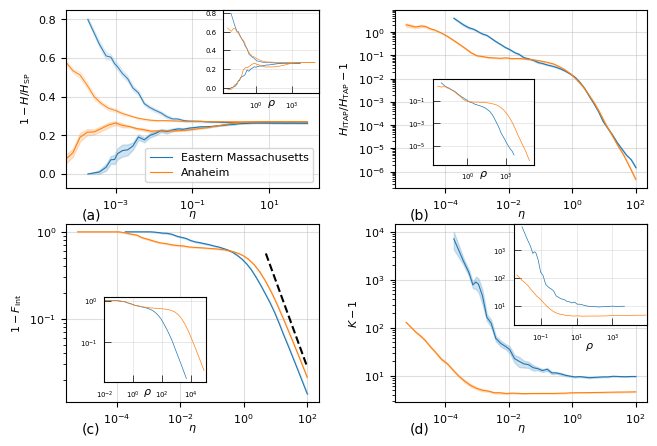

In [16]:
#plots for AA to be put in the main text
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

#2x2 plots of dependence on N of FW/RITAP gap, Fint, degen.
#plots for BPR nonlinearity
matplotlib.rcParams.update({'text.usetex': usetex,'font.size': 8})
fig, axes = plt.subplots(2, 2, figsize=(7.5,5.1),gridspec_kw={'wspace': 0.3})   
x_to_plot='eta'
x_to_plot_inset='rho'
###UPPER LEFT####
linewidth=0.8
linewidth_inset=0.5
font_size_inset=5
y_to_plot= 'en_gain_intFW_SP'#'rel_en_diff_intFW_FW'#'frac_shortest_paths'#'avg_traf_int_paths'#'frac_int_paths'#'rel_opt_gap'#'RGAP'#'sup_paths_od_degen_rtol_1e-3'#'avg_degen_od_FW'#'avg_traf_int_paths' #'frac_shortest_paths'#'frac_int_paths'#'rel_opt_gap'#'RGAP'#'en_gain_intFW_SP' #'avg_traf_shortest_paths'
y_to_plot2= 'en_gain_FW_SP'#'rel_en_diff_intFW_FW'#'frac_shortest_paths'#'avg_traf_int_paths'#'frac_int_paths'#'rel_opt_gap'#'RGAP'#'sup_paths_od_degen_rtol_1e-3'#'avg_degen_od_FW'#'avg_traf_int_paths' #'frac_shortest_paths'#'frac_int_paths'#'rel_opt_gap'#'RGAP'#'en_gain_intFW_SP' #'avg_traf_shortest_paths'
d=3
df1=df_mean_std
maxN=max(df1['N'].unique().tolist())
minN=min(df1['N'].unique().tolist())
shaded_errors=True
errorbars=False
colormap = cm.viridis
norm = plt.Normalize(vmin=np.log(minN), vmax=np.log(maxN))

ax_inset = inset_axes(axes[0, 0], width="40%", height="40%", loc='lower left', bbox_to_anchor=(0.6, 0.5, 0.95, 1.17),bbox_transform=axes[0,0].transAxes)
# Map the color value to a color using the colormap
for i,N in enumerate(df1['N'].unique().tolist()):
    if(N==74):
        label="Eastern Massachusetts"
    elif(N==416):
        label="Anaheim"
    df_sel=df1[df1['N']==N]
    df_sel= df_sel.sort_values(by=x_to_plot)
    color = f"C{i}"#colormap(norm(np.log(N)))
    
    if(errorbars):
        axes[0,0].errorbar(df_sel[x_to_plot],df_sel[y_to_plot],alpha=0.9,c=color,label=label,yerr=df_sel[y_to_plot+'_std'],capsize=1,lw=linewidth)
        ax_inset.errorbar(df_sel[x_to_plot_inset],df_sel[y_to_plot],alpha=0.9,c=color,label=label,yerr=df_sel[y_to_plot+'_std'],capsize=1,lw=linewidth)

    else:
        axes[0,0].plot(df_sel[x_to_plot],df_sel[y_to_plot],alpha=1,c=color,label=label,lw=linewidth)
        ax_inset.plot(df_sel[x_to_plot_inset],df_sel[y_to_plot],alpha=1,c=color,label=label,lw=linewidth_inset)

        if(y_to_plot2!=''):
            axes[0,0].plot(df_sel[x_to_plot],df_sel[y_to_plot2],alpha=0.9,c=color,lw=linewidth)
            ax_inset.plot(df_sel[x_to_plot_inset],df_sel[y_to_plot2],alpha=0.9,c=color,lw=linewidth_inset)

        if shaded_errors:
            axes[0,0].fill_between(df_sel[x_to_plot],(df_sel[y_to_plot]-df_sel[y_to_plot+'_std']),(df_sel[y_to_plot]+df_sel[y_to_plot+'_std']),color=color,alpha=0.2)
            #ax_inset.fill_between(df_sel[x_to_plot_inset],(df_sel[y_to_plot]-df_sel[y_to_plot+'_std']),(df_sel[y_to_plot]+df_sel[y_to_plot+'_std']),color=color,alpha=0.2)

            if(y_to_plot2!=''):
                axes[0,0].fill_between(df_sel[x_to_plot],(df_sel[y_to_plot2]-df_sel[y_to_plot2+'_std']),(df_sel[y_to_plot2]+df_sel[y_to_plot2+'_std']),color=color,alpha=0.1)
                #ax_inset.fill_between(df_sel[x_to_plot_inset],(df_sel[y_to_plot2]-df_sel[y_to_plot2+'_std']),(df_sel[y_to_plot2]+df_sel[y_to_plot2+'_std']),color=color,alpha=0.1)

axes[0,0].grid(alpha=0.4)
axes[0,0].set_xlabel(r"$\eta$")
axes[0,0].set_ylabel("$1-H/H_\mathrm{SP}$")

ax_inset.set_xscale('log')
ax_inset.grid(alpha=0.4,linewidth=linewidth_inset)
ax_inset.tick_params(labelsize=font_size_inset) 
ax_inset.set_xlabel(r"$\rho$",labelpad=-10)
ax_inset.tick_params(axis='x', direction='in', length=5, width=linewidth_inset, pad=5)
ax_inset.tick_params(axis='y', direction='in', length=5, width=linewidth_inset, pad=5)
#ax_inset.set_xlim([1e-1,200])

ax_inset.minorticks_off()
#ax_inset.set_ylim([1e-2,1.9e-1])
axes[0,0].grid(alpha=0.4)
axes[0,0].set_xlabel(r"$\eta$",labelpad=-2)

axes[0,0].set_ylabel("$1-H/H_\mathrm{SP}$")
axes[0,0].set_xscale('log')
axes[0,0].set_xlim([5e-5,2e2])
#axes[0,0].set_ylim([1e-2,1.7e-1])

axes[0,0].text(0.1, -0.15, "(a)", ha='center', va='center', transform=axes[0,0].transAxes, fontsize=10)
axes[0,0].legend(loc='lower right')

##################
###UPPER RIGHT####
##################

y_to_plot= 'rel_en_diff_intFW_FW'#'frac_shortest_paths'#'avg_traf_int_paths'#'frac_int_paths'#'rel_opt_gap'#'RGAP'#'sup_paths_od_degen_rtol_1e-3'#'avg_degen_od_FW'#'avg_traf_int_paths' #'frac_shortest_paths'#'frac_int_paths'#'rel_opt_gap'#'RGAP'#'en_gain_intFW_SP' #'avg_traf_shortest_paths'
y_to_plot2= ''#'rel_en_diff_intFW_FW'#'frac_shortest_paths'#'avg_traf_int_paths'#'frac_int_paths'#'rel_opt_gap'#'RGAP'#'sup_paths_od_degen_rtol_1e-3'#'avg_degen_od_FW'#'avg_traf_int_paths' #'frac_shortest_paths'#'frac_int_paths'#'rel_opt_gap'#'RGAP'#'en_gain_intFW_SP' #'avg_traf_shortest_paths'
df1=df_mean_std
maxN=max(df1['N'].unique().tolist())
minN=min(df1['N'].unique().tolist())
shaded_errors=True
errorbars=False
colormap = cm.viridis
norm = plt.Normalize(vmin=np.log(minN), vmax=np.log(maxN))
ax_inset = inset_axes(axes[0, 1], width="40%", height="40%", loc='lower left', bbox_to_anchor=(0.13, 0.1, 1, 1.2),bbox_transform=axes[0,1].transAxes)
# Map the color value to a color using the colormap
for i,N in enumerate(df1['N'].unique().tolist()):
    if(N==74):
        label="Eastern Massachusetts"
    elif(N==416):
        label="Anaheim"
    df_sel=df1[df1['N']==N]
    df_sel= df_sel.sort_values(by=x_to_plot)
    color = f"C{i}"#colormap(norm(np.log(N)))
    
    if(errorbars):
        axes[0,1].errorbar(df_sel[x_to_plot],df_sel[y_to_plot],alpha=0.9,c=color,label=f"{N}",yerr=df_sel[y_to_plot+'_std'],capsize=1,lw=linewidth)
        ax_inset.errorbar(df_sel[x_to_plot_inset],df_sel[y_to_plot],alpha=0.9,c=color,label=f"{N}",yerr=df_sel[y_to_plot+'_std'],capsize=1,lw=linewidth)

    else:
        axes[0,1].plot(df_sel[x_to_plot],df_sel[y_to_plot],alpha=1,c=color,label=label,lw=linewidth)
        ax_inset.plot(df_sel[x_to_plot_inset],df_sel[y_to_plot],alpha=1,c=color,label=label,lw=linewidth_inset)

        if(y_to_plot2!=''):
            axes[0,1].plot(df_sel[x_to_plot],df_sel[y_to_plot2],alpha=0.9,c=color,lw=linewidth)
            ax_inset.plot(df_sel[x_to_plot_inset],df_sel[y_to_plot2],alpha=0.9,c=color,lw=linewidth_inset)

        if shaded_errors:
            axes[0,1].fill_between(df_sel[x_to_plot],(df_sel[y_to_plot]-df_sel[y_to_plot+'_std']),(df_sel[y_to_plot]+df_sel[y_to_plot+'_std']),color=color,alpha=0.2)
            #ax_inset.fill_between(df_sel[x_to_plot_inset],(df_sel[y_to_plot]-df_sel[y_to_plot+'_std']),(df_sel[y_to_plot]+df_sel[y_to_plot+'_std']),color=color,alpha=0.2)

            if(y_to_plot2!=''):
                axes[0,1].fill_between(df_sel[x_to_plot],(df_sel[y_to_plot2]-df_sel[y_to_plot2+'_std']),(df_sel[y_to_plot2]+df_sel[y_to_plot2+'_std']),color=color,alpha=0.1)
                #ax_inset.fill_between(df_sel[x_to_plot_inset],(df_sel[y_to_plot2]-df_sel[y_to_plot2+'_std']),(df_sel[y_to_plot2]+df_sel[y_to_plot2+'_std']),color=color,alpha=0.1)

axes[0,1].grid(alpha=0.4)
axes[0,1].set_xlabel(r"$\eta$",labelpad=-2)

axes[0,1].set_ylabel("$H_\mathrm{ITAP}/H_\mathrm{TAP}-1$")
#axes[1].set_ylabel("Fraction of rerouted flow")
axes[0,1].set_xscale('log')
axes[0,1].set_yscale('log')

#axes[1].set_xlim([1e-1,1000])
#axes[1].set_ylim([1e-1,100])

axes[0,1].text(0.1, -0.15, "(b)", ha='center', va='center', transform=axes[0,1].transAxes, fontsize=10)

ax_inset.set_xscale('log')
ax_inset.set_yscale('log')
ax_inset.grid(alpha=0.4,linewidth=linewidth_inset)
ax_inset.tick_params(labelsize=font_size_inset) 
ax_inset.set_xlabel(r"$\rho$",labelpad=-10)
ax_inset.tick_params(axis='x', direction='in', length=5, width=linewidth_inset, pad=5)
ax_inset.tick_params(axis='y', direction='in', length=5, width=linewidth_inset, pad=5)
ax_inset.minorticks_off()


##################
###LOWER LEFT####
##################


y_to_plot= 'frac_integer_paths_tol_1e-04'#'frac_shortest_paths'#'avg_traf_int_paths'#'frac_int_paths'#'rel_opt_gap'#'RGAP'#'sup_paths_od_degen_rtol_1e-3'#'avg_degen_od_FW'#'avg_traf_int_paths' #'frac_shortest_paths'#'frac_int_paths'#'rel_opt_gap'#'RGAP'#'en_gain_intFW_SP' #'avg_traf_shortest_paths'
y_to_plot2= ''#'rel_en_diff_intFW_FW'#'frac_shortest_paths'#'avg_traf_int_paths'#'frac_int_paths'#'rel_opt_gap'#'RGAP'#'sup_paths_od_degen_rtol_1e-3'#'avg_degen_od_FW'#'avg_traf_int_paths' #'frac_shortest_paths'#'frac_int_paths'#'rel_opt_gap'#'RGAP'#'en_gain_intFW_SP' #'avg_traf_shortest_paths'
N=128
df1=df_mean_std
maxN=max(df1['N'].unique().tolist())
minN=min(df1['N'].unique().tolist())
shaded_errors=True
errorbars=False
colormap = cm.viridis
norm = plt.Normalize(vmin=np.log(minN), vmax=np.log(maxN))

ax_inset = inset_axes(axes[1,0], width="40%", height="40%", loc='lower left', bbox_to_anchor=(0.13, 0.08, 1, 1.2),bbox_transform=axes[1,0].transAxes)
# Map the color value to a color using the colormap
for i,N in enumerate(df1['N'].unique().tolist()):
    df_sel=df1[df1['N']==N]
    df_sel= df_sel.sort_values(by=x_to_plot)
    color = f"C{i}"#colormap(norm(np.log(N)))
    
    if(errorbars):
        axes[1,0].errorbar(df_sel[x_to_plot],1-df_sel[y_to_plot],alpha=0.9,c=color,label=f"{N}",yerr=df_sel[y_to_plot+'_std'],capsize=1,lw=linewidth)
        ax_inset.errorbar(df_sel[x_to_plot_inset],1-df_sel[y_to_plot],alpha=0.9,c=color,label=f"{N}",yerr=df_sel[y_to_plot+'_std'],capsize=1,lw=linewidth)

    else:
        axes[1,0].plot(df_sel[x_to_plot],1-df_sel[y_to_plot],alpha=1,c=color,label=f"${N}$",lw=linewidth)
        ax_inset.plot(df_sel[x_to_plot_inset],1-df_sel[y_to_plot],alpha=1,c=color,label=f"${N}$",lw=linewidth_inset)

        if(y_to_plot2!=''):
            axes[1,0].plot(df_sel[x_to_plot],1-df_sel[y_to_plot2],alpha=0.9,c=color,lw=linewidth)
            ax_inset.plot(df_sel[x_to_plot_inset],1-df_sel[y_to_plot2],alpha=0.9,c=color,lw=linewidth_inset)

        if shaded_errors:
            axes[1,0].fill_between(df_sel[x_to_plot],1-(df_sel[y_to_plot]-df_sel[y_to_plot+'_std']),1-(df_sel[y_to_plot]+df_sel[y_to_plot+'_std']),color=color,alpha=0.2)
            #ax_inset.fill_between(df_sel[x_to_plot_inset],1-(df_sel[y_to_plot]-df_sel[y_to_plot+'_std']),1-(df_sel[y_to_plot]+df_sel[y_to_plot+'_std']),color=color,alpha=0.2)

            if(y_to_plot2!=''):
                axes[1,0].fill_between(df_sel[x_to_plot],1-(df_sel[y_to_plot2]-df_sel[y_to_plot2+'_std']),1-(df_sel[y_to_plot2]+df_sel[y_to_plot2+'_std']),color=color,alpha=0.1)
                #ax_inset.fill_between(df_sel[x_to_plot_inset],1-(df_sel[y_to_plot2]-df_sel[y_to_plot2+'_std']),1-(df_sel[y_to_plot2]+df_sel[y_to_plot2+'_std']),color=color,alpha=0.1)

                
                
ax_inset.set_xscale('log')
ax_inset.set_yscale('log')
ax_inset.grid(alpha=0.4,linewidth=linewidth_inset)
ax_inset.tick_params(labelsize=font_size_inset) 
ax_inset.set_xlabel(r"$\rho$",labelpad=-10,)
ax_inset.tick_params(axis='x', direction='in', length=5, width=linewidth_inset, pad=5)
ax_inset.tick_params(axis='y', direction='in', length=5, width=linewidth_inset, pad=5)
ax_inset.minorticks_off()
ax_inset.set_xlim([1e-2,1e5])
ax_inset.xaxis.set_label_coords(.43, -.05)



axes[1,0].grid(alpha=0.4)
axes[1,0].set_xlabel(r"$\eta$",labelpad=-2)

axes[1,0].set_ylabel("$1-F_\mathrm{int}$")
#axes[1].set_ylabel("Fraction of rerouted flow")
axes[1,0].set_xscale('log')
axes[1,0].set_yscale('log')
#axes[1].set_xlim([1e-1,1000])
#axes[1].set_ylim([1e-1,100])

axes[1,0].text(0.1, -0.15, "(c)", ha='center', va='center', transform=axes[1,0].transAxes, fontsize=10)
xlin=np.linspace(5,100,100)
power_law=2.82/xlin
axes[1,0].plot(xlin,power_law, color='black',ls='--')


##################
###LOWER RIGHT####
##################

y_to_plot= 'sup_paths_od_degen_rtol_1e-5'#'frac_shortest_paths'#'avg_traf_int_paths'#'frac_int_paths'#'rel_opt_gap'#'RGAP'#'sup_paths_od_degen_rtol_1e-3'#'avg_degen_od_FW'#'avg_traf_int_paths' #'frac_shortest_paths'#'frac_int_paths'#'rel_opt_gap'#'RGAP'#'en_gain_intFW_SP' #'avg_traf_shortest_paths'
y_to_plot2= ''#'rel_en_diff_intFW_FW'#'frac_shortest_paths'#'avg_traf_int_paths'#'frac_int_paths'#'rel_opt_gap'#'RGAP'#'sup_paths_od_degen_rtol_1e-3'#'avg_degen_od_FW'#'avg_traf_int_paths' #'frac_shortest_paths'#'frac_int_paths'#'rel_opt_gap'#'RGAP'#'en_gain_intFW_SP' #'avg_traf_shortest_paths'
N=128
df1=df_mean_std
maxN=max(df1['N'].unique().tolist())
minN=min(df1['N'].unique().tolist())
shaded_errors=True
errorbars=False
colormap = cm.viridis
norm = plt.Normalize(vmin=np.log(minN), vmax=np.log(maxN))

ax_inset = inset_axes(axes[1,1], width="40%", height="40%", loc='lower left', bbox_to_anchor=(0.45, 0.4, 1.32, 1.42),bbox_transform=axes[1,1].transAxes)
# Map the color value to a color using the colormap
for i,N in enumerate(df1['N'].unique().tolist()):
    df_sel=df1[df1['N']==N]
    df_sel= df_sel.sort_values(by=x_to_plot)
    color = f"C{i}"#colormap(norm(np.log(N)))
    
    if(errorbars):
        if(i==1):
            y_to_plot='proxy_degen_sup_paths_tol_1e-6'
        axes[1,1].errorbar(df_sel[x_to_plot],df_sel[y_to_plot]-1,alpha=0.9,c=color,label=f"{N}",yerr=df_sel[y_to_plot+'_std'],capsize=1,lw=linewidth)
        ax_inset.errorbar(df_sel[x_to_plot_inset],df_sel[y_to_plot]-1,alpha=0.9,c=color,label=f"{N}",yerr=df_sel[y_to_plot+'_std'],capsize=1,lw=linewidth)

    else:
        if(i==1):
            y_to_plot='proxy_degen_sup_paths_tol_1e-6'
        axes[1,1].plot(df_sel[x_to_plot],df_sel[y_to_plot]-1,alpha=1,c=color,label=f"${N}$",lw=linewidth)
        ax_inset.plot(df_sel[x_to_plot_inset],df_sel[y_to_plot]-1,alpha=1,c=color,label=f"${N}$",lw=linewidth_inset)

        if(y_to_plot2!=''):
            axes[1,1].plot(df_sel[x_to_plot],df_sel[y_to_plot2]-1,alpha=0.9,c=color,lw=linewidth)
            #ax_inset.plot(df_sel[x_to_plot_inset],df_sel[y_to_plot2]-1,alpha=0.9,c=color,lw=linewidth_inset)

        if shaded_errors:
            axes[1,1].fill_between(df_sel[x_to_plot],(df_sel[y_to_plot]-df_sel[y_to_plot+'_std'])-1,(df_sel[y_to_plot]+df_sel[y_to_plot+'_std'])-1,color=color,alpha=0.2)
            #ax_inset.fill_between(df_sel[x_to_plot_inset],(df_sel[y_to_plot]-df_sel[y_to_plot+'_std'])-1,(df_sel[y_to_plot]+df_sel[y_to_plot+'_std'])-1,color=color,alpha=0.2)

            if(y_to_plot2!=''):
                axes[1,1].fill_between(df_sel[x_to_plot],(df_sel[y_to_plot2]-df_sel[y_to_plot2+'_std'])-1,(df_sel[y_to_plot2]+df_sel[y_to_plot2+'_std'])-1,color=color,alpha=0.1)
                #ax_inset.fill_between(df_sel[x_to_plot_inset],(df_sel[y_to_plot2]-df_sel[y_to_plot2+'_std'])-1,(df_sel[y_to_plot2]+df_sel[y_to_plot2+'_std'])-1,color=color,alpha=0.1)

                
                
ax_inset.set_xscale('log')
ax_inset.set_yscale('log')
ax_inset.grid(alpha=0.4,linewidth=linewidth_inset)
ax_inset.tick_params(labelsize=font_size_inset) 
ax_inset.set_xlabel(r"$\rho$",labelpad=-10,horizontalalignment='right')
ax_inset.tick_params(axis='x', direction='in', length=5, width=linewidth_inset, pad=5)
ax_inset.tick_params(axis='y', direction='in', length=5, width=linewidth_inset, pad=5)
ax_inset.minorticks_off()
ax_inset.xaxis.set_label_coords(.6, -.15)
ax_inset.set_ylim([2,9e3])
ax_inset.set_xlim([3e-3,9e4])


axes[1,1].grid(alpha=0.4)
axes[1,1].set_xlabel(r"$\eta$",labelpad=-2)

axes[1,1].set_ylabel("$K-1$")
#axes[1].set_ylabel("Fraction of rerouted flow")
axes[1,1].set_xscale('log')
axes[1,1].set_yscale('log')


axes[1,1].text(0.1, -0.15, "(d)", ha='center', va='center', transform=axes[1,1].transAxes, fontsize=10)

plt.savefig('./results/pics/TAP_ITAP_conv_real_data.pdf',bbox_inches='tight',dpi=600)
